# Solar and lunar eclipses
## PlanetaryEphemeris.jl vs JPL DE-430 ephemeris 

This notebook performs a Taylor integration of a Solar System model which includes point-mass interactions between the Sun, the eight planets (Mercury through Neptune), the Moon and up to 343 main-belt asteroids. During the integration, we predict the occurrence of solar and lunar eclipses starting from September 2015 through 2020. As calculated from JPL ephemeris, the eclipses which have occurred (and will occur) between Sep 28, 2015 and Dec 11, 2020 are (times are reported in TDB time scale):

|Date of eclipse | Time of eclipse (TDB)|
|-|-|
| 2015-09-28 | 02:48:49.613 |
| 2016-03-09 | 01:58:53.24  |
| 2016-03-23 | 11:49:05.451 |
| 2016-09-01 | 09:08:42.583 |
| 2016-09-16 | 18:56:01.53  |
| 2017-02-11 | 00:45:40.174 |
| 2017-02-26 | 14:55:09.431 |
| 2017-08-07 | 18:22:17.984 |
| 2017-08-21 | 18:27:16.654 |
| 2018-01-31 | 13:31:34.204 |
| 2018-02-15 | 20:53:09.777 |
| 2018-07-13 | 03:02:47.574 |
| 2018-07-27 | 20:23:37.001 |
| 2018-08-11 | 09:48:02.699 |
| 2019-01-06 | 01:43:25.107 |
| 2019-01-21 | 05:14:00.736 |
| 2019-07-02 | 19:24:40.137 |
| 2019-07-16 | 21:32:35.889 |
| 2019-12-26 | 05:19:33.286 |
| 2020-01-10 | 19:11:47.471 |
| 2020-06-05 | 19:26:49.197 |
| 2020-06-21 | 06:41:53.938 |
| 2020-07-05 | 04:31:48.643 |
| 2020-11-30 | 09:44:44.858 |
| 2020-12-14 | 16:15:14.724 |

We transform the table below to Julian dates, in order to compare them with numerical integrations performed with `TaylorIntegration.jl` and `PlanetaryEphemeris.jl`:

In [29]:
tvS_JPL_ = [
    2.4572936172408904e6, 
    2.457456582560654e6, 
    2.457470992424201e6, 
    2.4576328810484153e6, 
    2.4576482889066027e6, 
    2.457795531714972e6, 
    2.457811121636933e6, 
    2.457973265485929e6, 
    2.45798726894276e6, 
    2.4581500635903236e6, 
    2.45816537025205e6,
    2.4583126269395184e6,
    2.4583273497338057e6,
    2.4583419083645726e6,
    2.4584895718183713e6,
    2.458504718064075e6,
    2.4586673087978857e6,
    2.4586813976376085e6,
    2.4588437219130266e6,
    2.458859299854985e6,
    2.459006310291634e6,
    2.459021779096507e6,
    2.45903568875744e6,
    2.45918390607475e6,
    2.459198177253751e6,
    ];

ΔtvS_JPL = [800e-6, 870e-6, 860e-6, 930e-6, 1035e-6, 
    1000e-6, 1040e-6, 1170e-6, 1090e-6, 1190e-6, 
    1149e-6, 1159e-6, 1269e-6, 1159e-6, 1240e-6, 
    1230e-6, 1400e-6, 1309e-6, 1399e-6, 1460e-6, 
    1379e-6, 1561e-6, 1380e-6, 1590e-6, 1445e-6] # seconds

tvS_JPL = tvS_JPL_ .+ ΔtvS_JPL/daysec;

# Setup

In [2]:
versioninfo()

Julia Version 1.4.2
Commit 44fa15b150* (2020-05-23 18:35 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.7.0)
  CPU: Intel(R) Core(TM) i7-4750HQ CPU @ 2.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, haswell)
Environment:
  JULIA_EDITOR = emacs -nw
  JULIA_NUM_THREADS = 4


In [3]:
Threads.nthreads()

4

In [4]:
;pwd

/Users/Jorge/projects/PlanetaryEphemeris/notebooks


In [5]:
] st

Project PlanetaryEphemeris v0.1.0
Status `~/projects/PlanetaryEphemeris/Project.toml`
  [4138dd39] JLD v0.10.0 #master (https://github.com/JuliaIO/JLD.jl.git)
  [be4d8f0f] Quadmath v0.5.4
  [295af30f] Revise v2.6.6
  [92b13dbe] TaylorIntegration v0.8.3 #jp/interpolation (https://github.com/PerezHz/TaylorIntegration.jl.git)
  [6aa5eb33] TaylorSeries v0.10.6 #lb/iss242 (https://github.com/JuliaDiff/TaylorSeries.jl.git)
  [ade2ca70] Dates 
  [8bb1440f] DelimitedFiles 
  [37e2e46d] LinearAlgebra 
  [de0858da] Printf 
  [8dfed614] Test 


Extended precision arithmetic setup

In [6]:
#]add Quadmath
#using Quadmath

We call all relevant packages:

In [6]:
using Revise

┌ Info: Precompiling Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1260


In [7]:
using PlanetaryEphemeris, TaylorIntegration
using Dates, LinearAlgebra

┌ Info: Precompiling PlanetaryEphemeris [d83715d0-7e5f-11e9-1a59-4137b20d8363]
└ @ Base loading.jl:1260
:-
  ** incremental compilation may be fatally broken for this module **

:-
  ** incremental compilation may be fatally broken for this module **

:-
  ** incremental compilation may be fatally broken for this module **

:-
  ** incremental compilation may be fatally broken for this module **

:-
  ** incremental compilation may be fatally broken for this module **

:-
  ** incremental compilation may be fatally broken for this module **

:-
  ** incremental compilation may be fatally broken for this module **

:*
  ** incremental compilation may be fatally broken for this module **

:*
  ** incremental compilation may be fatally broken for this module **

:-
  ** incremental compilation may be fatally broken for this module **

:*
  ** incremental compilation may be fatally broken for this module **

:*
  ** incremental compilation may be fatally broken for this module **

:-
  ** 

In [8]:
using JLD

In [9]:
using SPICE

In [35]:
furnsh("/Users/Jorge/.julia/artifacts/db3e3a765712a792a7f4a73634213d53fc0561ec//de430_1850-2150.bsp")

In [33]:
furnsh("/Users/Jorge/.julia/artifacts/8fa307fe9da2a63ed0cf9d681540d94a619a0995/naif0012.tls")

In [34]:
furnsh("/Users/Jorge/projects/PlanetaryEphemeris/eph/ast343de430.bsp")

Some parameters for the Taylor integration:

+ `order`: the order of expansion of the Taylor series
+ `abs_tol`: the absolute error tolerance 
+ `t0`: the initial time (currently, initial conditions are set to Sept. 20. 2015 00:00:00.00 TDB)
+ `tmax`: the final time of integration

In [31]:
const order = 30
const abstol=1.0E-30
const t0 = 0.0
const jd0 = datetime2julian(DateTime(2015,9,20,0,0,0)) #starting time of integration
#const jd0 = datetime2julian(DateTime(1969,6,28,0,0,0)) #starting time of integration
const tmax = t0+5.25yr #final time of integration
tS_JPL = (tvS_JPL .- jd0)/yr;

In [14]:
UJ_interaction[1:13,1:11]

13×11 Array{Bool,2}:
 0  0  0  1  1  0  0  0  0  0  0
 1  0  0  1  1  0  0  0  0  0  0
 1  0  0  1  1  0  0  0  0  0  0
 1  0  0  0  1  0  0  0  0  0  0
 1  0  0  1  0  0  0  0  0  0  0
 1  0  0  1  1  0  0  0  0  0  0
 1  0  0  1  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0

In [15]:
# Check that Earth's and Moon's gravity fields don't
# interact with point masses beyond Jupiter --> should evaluate to `true`
!any(UJ_interaction[8:end,2:end]) # -> true

true

In [16]:
#check that no figure interacts with itself --> should evaluate to `true`
!any(diag(UJ_interaction)) # -> true

true

In [17]:
# Sun's J2 interacts with planets, Moon and Pluto? --> should evaluate to `true`
all(UJ_interaction[2:11,su])

true

In [18]:
# Sun's J2 interacts with any asteroid? --> should evaluate to `false`
any(UJ_interaction[12:end,su])

false

Load Taylor ephemeris for DE430 lunar libration angles

In [19]:
#eulang_de430_path = "moon_pa_de430_2015_2020_et.jld"
eulang_de430_path = joinpath(dirname(pathof(PlanetaryEphemeris)), "../eph/moon_pa_de430_2003_2036_et.jld")

"/Users/Jorge/projects/PlanetaryEphemeris/src/../eph/moon_pa_de430_2003_2036_et.jld"

In [20]:
eulang_de430 = load(eulang_de430_path, "eulang_de430");

In [21]:
eulang_de430((8+jd0-J2000)*daysec+Taylor1(30))

3-element Array{Taylor1{Float64},1}:
  - 0.0004701948400929127 - 3.588499158383892e-9 t + 3.121533676046649e-15 t² + 6.646099975808711e-21 t³ - 2.2559088134833125e-27 t⁴ - 9.51047291093733e-33 t⁵ + 8.408582562842781e-40 t⁶ + 1.1454536565887183e-44 t⁷ + 1.4128120949941393e-51 t⁸ - 6.60965935229082e-57 t⁹ + 𝒪(t³¹)
  0.4355330405561875 + 9.628084196590642e-10 t + 2.0161899952966832e-15 t² - 1.2474615050088256e-21 t³ - 3.352589946539416e-27 t⁴ + 6.3448002547289156e-34 t⁵ + 4.5713353838139416e-39 t⁶ + 2.1301979334554914e-46 t⁷ - 5.377864357573425e-51 t⁸ - 3.309767606459695e-57 t⁹ + 𝒪(t³¹)
      3886.1961076315115 + 2.664698812578199e-6 t - 2.828252293255131e-15 t² - 5.628794131346657e-21 t³ + 2.0613438834459944e-27 t⁴ + 8.266498391930003e-33 t⁵ - 8.030691811214937e-40 t⁶ - 1.002118561771345e-44 t⁷ - 1.1673990046403653e-51 t⁸ + 5.824182125331548e-57 t⁹ + 𝒪(t³¹)

## Initial conditions

In [22]:
const solar_system_majorbodies_ids = [10,199,299,399,301,4,5,6,7,8,9];

In [23]:
# NAIF IDs of 343 asteroid list included in DE430/431 model(without the 2000--- prefix)
#de430_343ast_ids = [
#    1, 4, 2, 10, 31, 704, 511, 15, 3, 16, 65, 88, 48, 52, 451, 87, 7, 423, 29, 24, 
#    13, 790, 372, 107, 354, 96, 386, 39, 324, 11, 94, 22, 120, 185, 14, 536, 9, 165, 19, 130, 
#    128, 187, 41, 532, 85, 444, 702, 137, 471, 45, 6, 76, 154, 409, 145, 308, 121, 349, 144, 216, 
#    59, 259, 566, 747, 8, 93, 54, 405, 47, 489, 106, 344, 168, 238, 268, 69, 712, 420, 104, 690, 
#    129, 618, 375, 814, 150, 196, 117, 139, 164, 225, 147, 92, 146, 173, 27, 212, 596, 895, 141, 5, 
#    105, 56, 57, 419, 127, 490, 410, 654, 381, 74, 388, 68, 505, 508, 89, 360, 909, 134, 481, 46, 
#    334, 469, 140, 776, 211, 241, 40, 34, 514, 28, 705, 328, 175, 303, 159, 1093, 70, 42, 554, 194, 
#    95, 247, 466, 356, 156, 209, 51, 21, 772, 192, 98, 91, 476, 162, 35, 426, 455, 804, 276, 595, 
#    346, 37, 788, 86, 602, 762, 17, 283, 18, 506, 769, 233, 250, 773, 545, 12, 488, 23, 326, 275, 
#    203, 266, 221, 521, 751, 357, 230, 200, 191, 114, 635, 36, 181, 176, 626, 148, 26, 50, 784, 675, 
#    786, 407, 393, 709, 980, 171, 694, 416, 491, 780, 30, 335, 412, 404,674, 713, 71, 377, 350, 110, 
#    223, 373, 100, 449, 38, 210, 498, 102, 1015, 84, 90, 345, 791, 358, 663, 227, 32, 740, 206, 80, 
#    313, 366, 445, 236, 143, 503, 696, 1467, 240, 385, 83, 62, 517, 109, 683, 849, 97, 160, 81, 201, 
#    387, 103, 680, 1107, 213, 135, 691, 20, 205, 667, 124, 163, 568, 735, 58, 78, 195, 79, 322, 362, 
#    464, 72, 365, 454, 1021, 49, 424, 99, 43, 535, 25, 739, 363, 516, 599, 304, 82, 465, 1036, 604, 
#    431, 1171, 53, 389, 598, 569, 760, 112, 369, 336, 63, 442, 115, 415, 338, 329, 60, 593, 752, 77, 
#    287, 778, 44, 177, 75, 172, 914, 224, 485, 337, 111, 547, 118, 113, 347, 584, 198, 591, 432, 623, 
#    132, 585, 433
#]
@show length(de430_343ast_ids)
@show unique(de430_343ast_ids) == de430_343ast_ids
# include only the first 50
#de430_343ast_50_ids = parse.(Int, "2".*lpad.(de430_343ast_ids[1:100], 6, '0'))
#de430_343ast_50_ids = Int[]
#de430_343ast_50_ids = parse.(Int, "2".*lpad.(de430_343ast_ids[1:16], 6, '0'))
#de430_343ast_50_ids = parse.(Int, "2".*lpad.(de430_343ast_ids[1:40], 6, '0'))
de430_343ast_50_ids = parse.(Int, "2".*lpad.(de430_343ast_ids[1:11], 6, '0'))
# 
const ss_all_bodies_ids = union(solar_system_majorbodies_ids, de430_343ast_50_ids)
#const ss_all_bodies_ids = solar_system_majorbodies_ids # no asteroids

length(de430_343ast_ids) = 343
unique(de430_343ast_ids) == de430_343ast_ids = true


22-element Array{Int64,1}:
      10
     199
     299
     399
     301
       4
       5
       6
       7
       8
       9
 2000001
 2000004
 2000002
 2000010
 2000031
 2000704
 2000511
 2000015
 2000003
 2000016
 2000065

In [24]:
typeof(ss_all_bodies_ids)

Array{Int64,1}

We define an array, `q0`, which will store the initial conditions for the Solar System, and will be passed as an argument for the Taylor integrator:

In [25]:
const N = length(ss_all_bodies_ids)
q0_ = Vector{Float64}(undef, 6N) #initial condition array
@show N, length(q0_)

(N, length(q0_)) = (22, 132)


(22, 132)

Read initial conditions from DE430 binary SPK

In [36]:
#et_ = str2et("1969-6-28 00:00:00 TDB")
et_ = str2et("2015-9-20 00:00:00 TDB")
#et_ = str2et("2008-9-24 00:00:00 TDB")

4.959792e8

In [37]:
pv = spkgeo(ss_all_bodies_ids[6], et_, "J2000", 0)[1]; pv /= au; pv[4:6] *= 86400; pv

6-element Array{Float64,1}:
 -1.0297713908610753
  1.1559308701821733
  0.55790263241437
 -0.010362955629798155
 -0.006997332533090788
 -0.0029298919046632536

In [38]:
#?spkgeo

In [39]:
for i in 1:N
    pv = spkgeo(ss_all_bodies_ids[i], et_, "J2000", 0)[1]
    pv /= au
    pv[4:6] *= 86400
    q0_[union(3i-2:3i,3(N+i)-2:3(N+i))] = pv
end

In [40]:
ind=N; q0_[union(3ind-2:3ind,3(N+ind)-2:3(N+ind))]

6-element Array{Float64,1}:
  2.7207627806066346
 -1.6560373806033404
 -0.6834464706471626
  0.006156489243822229
  0.007184478417375337
  0.00247456767089288

In [41]:
ind=4; q0_[union(3ind-2:3ind,3(N+ind)-2:3(N+ind))]

6-element Array{Float64,1}:
  1.0062171925293986
 -0.05533994964680921
 -0.024169814955796367
  0.0007620558855465716
  0.01570464836598652
  0.0068078648544312795

In [42]:
norm(q0_[union(3ind-2:3ind,3(N+ind)-2:3(N+ind))][1:3]), norm(q0_[union(3ind-2:3ind,3(N+ind)-2:3(N+ind))][4:6])*au/86400

(1.0080276427378634, 29.666264918117026)

In [43]:
#check that no element of q0_ was left uninitialized
iav = Vector{Bool}(undef, length(q0_))
for i in eachindex(q0_)
    iav = isassigned(q0_, i)
end
@show all(iav);

all(iav) = true


In [44]:
#check that there are no NANs
q0_ == q0_

true

Construct `q0` as a vector of `Quadmath.Float128`s (DE430/431 ephemerides are integrated using quadruple precision)

In [45]:
q0 = q0_;
#q0 = Float128.(q0_);

In [46]:
# diff eqs parameters
S = eltype(q0)
#N, S, eulang_de430
if eltype(q0) == Float64
    params = (N, S, eulang_de430, jd0)
elseif eltype(q0) == Float128
    params = (N, S, eulang_de430_af, jd0)
end
params_ = (N, eltype(q0_), eulang_de430, jd0)
;

In [47]:
eltype(q0)

Float64

In [48]:
typeof(q0), length(q0), 6N, length(q0) == 6N

(Array{Float64,1}, 132, 132, true)

## Equations of motion

Dynamical model includes:

- Sun, 8 planets, Moon, Pluto and main-belt 343 asteroids
- Post-newtonian accelerations between all bodies
- Accelerations due to Earth's $J_2\ldots J_5$ with Sun and planets Mercury through Jupiter; and reaction accelerations
- Accelerations due to the Moon's gravity field up to 6th order (zonal and tesseral harmonics) upon Sun and planets Mercury through Jupiter; and reaction accelerations
- Sun's $J_2$ interaction with planets, Moon and Pluto; and reaction accelerations
- IAU 1976/1980 Earth's pole precession and nutation (nutation only includes 18.6 yr term of IAU nutation series)
- Tidal acceleration of Moon due to tides raised on Earth by Moon and Sun (long-period, diurnal, semi-diurnal)

Below, we write down the equations of motion for the post-Newtonian $N$-body problem. Note that this is this system of equations is coupled for the accelerations $\dot{\vec v_j}$, and we solve it using succesive approximations, with the Newtonian accelerations as an initial ansatz. Typically, for 64-bit precision, only 1 iteration is enough for convergence. Anyway, the post-Newtonian N-body accelerations are accurate to order $1/c^2$, so using the Newtonian accelerations in the coupled terms should be accurate to the same order (Folkner et al., 2014)

The optimal number of iterations for the succesive approximations of the post-Newtonian accelerations, starting from a Newtonian ansatz, is 1. With 2 or more iterations, there are no further corrections using `Float64`.

In [49]:
#WARNING!!! this is the multi-threaded version!! (i.e., uses @threads!!!!)
@taylorize function DE430_dev!(dq, q, params, t)
    # N: number of bodies
    # S: auxiliary variable =eltype(q0)
    # eulang_de430_: Taylor interpolant for DE430 lunar orientation Euler angles
    local N, S, eulang_de430_, jd0 = params
    local N_ext = 11 # number of bodies in extended-body accelerations
    local N_back = 11 # number of bodies in backward integration
    local params_back = (N_back, S, eulang_de430_, jd0)
    local qq_ = Taylor1.(constant_term.(q[union(1:3N_back, 3N+1:3N+3N_back)]), t.order)
    local dqq_ = similar(qq_)
    #local xaux_ = similar(qq_)
    #local jtcffs = TaylorIntegration.jetcoeffs!(NBP_pN_A_J23E_J23M_J2S_threads!, t, qq_, dqq_, xaux_, params_back)
    local jtcffs = TaylorIntegration.jetcoeffs!(Val(NBP_pN_A_J23E_J23M_J2S_threads!), t, qq_, dqq_, params_back)
    local __t = Taylor1(t.order)
    local q_del_τ_M = qq_(__t-τ_M)
    local q_del_τ_0 = qq_(__t-τ_0p)
    local q_del_τ_1 = qq_(__t-τ_1p)
    local q_del_τ_2 = qq_(__t-τ_2p)

    local eulang_t = eulang_de430_( (t+(jd0-J2000))*daysec )
    local eulang_t_del = eulang_de430_( ((t-τ_M)+(jd0-J2000))*daysec )

    #TODO: handle appropiately @taylorize'd version with postnewton_iter>1
    local postnewton_iter = 1 # number of iterations of post-Newtonian subroutine

    # parameters related to speed of light, c
    local c_p2 = 29979.063823897606 # c^2 = 29979.063823897606 au^2/d^2
    local c_m2 = 3.3356611996764786e-5 # c^-2 = 3.3356611996764786e-5 d^2/au^2

    local zero_q_1 = zero(q[1])
    local one_t = one(t)

    X = Array{Taylor1{S}}(undef, N, N)
    Y = Array{Taylor1{S}}(undef, N, N)
    Z = Array{Taylor1{S}}(undef, N, N)

    r_p2 = Array{Taylor1{S}}(undef, N, N)
    r_p3d2 = Array{Taylor1{S}}(undef, N, N)
    r_p7d2 = Array{Taylor1{S}}(undef, N, N)

    #Newtonian accelerations
    newtonX = Array{Taylor1{S}}(undef, N)
    newtonY = Array{Taylor1{S}}(undef, N)
    newtonZ = Array{Taylor1{S}}(undef, N)

    newtonianCoeff = Array{Taylor1{S}}(undef, N, N)

    #post-Newtonian stuff
    U = Array{Taylor1{S}}(undef, N, N)
    V = Array{Taylor1{S}}(undef, N, N)
    W = Array{Taylor1{S}}(undef, N, N)

    _4U_m_3X = Array{Taylor1{S}}(undef, N, N)
    _4V_m_3Y = Array{Taylor1{S}}(undef, N, N)
    _4W_m_3Z = Array{Taylor1{S}}(undef, N, N)

    UU = Array{Taylor1{S}}(undef, N, N)
    VV = Array{Taylor1{S}}(undef, N, N)
    WW = Array{Taylor1{S}}(undef, N, N)

    r_p1d2 = Array{Taylor1{S}}(undef, N, N)

    newtonianNb_Potential = Array{Taylor1{S}}(undef, N)
    newtonian1b_Potential = Array{Taylor1{S}}(undef, N, N)
    newtonianCoeff = Array{Taylor1{S}}(undef, N, N)
    newton_acc_X = Array{Taylor1{S}}(undef, N, N)
    newton_acc_Y = Array{Taylor1{S}}(undef, N, N)
    newton_acc_Z = Array{Taylor1{S}}(undef, N, N)

    v2 = Array{Taylor1{S}}(undef, N)
    vi_dot_vj = Array{Taylor1{S}}(undef, N, N)
    pn2 = Array{Taylor1{S}}(undef, N, N)
    pn3 = Array{Taylor1{S}}(undef, N, N)
    _4ϕj = Array{Taylor1{S}}(undef, N, N)
    ϕi_plus_4ϕj = Array{Taylor1{S}}(undef, N, N)
    sj2_plus_2si2_minus_4vivj = Array{Taylor1{S}}(undef, N, N)
    ϕs_and_vs = Array{Taylor1{S}}(undef, N, N)
    U_t_pn2 = Array{Taylor1{S}}(undef, N, N)
    V_t_pn2 = Array{Taylor1{S}}(undef, N, N)
    W_t_pn2 = Array{Taylor1{S}}(undef, N, N)
    pn1t1_7 = Array{Taylor1{S}}(undef, N, N)

    pntempX = Array{Taylor1{S}}(undef, N, postnewton_iter)
    pntempY = Array{Taylor1{S}}(undef, N, postnewton_iter)
    pntempZ = Array{Taylor1{S}}(undef, N, postnewton_iter)
    pn1 = Array{Taylor1{S}}(undef, N, N, postnewton_iter)
    X_t_pn1 = Array{Taylor1{S}}(undef, N, N, postnewton_iter)
    Y_t_pn1 = Array{Taylor1{S}}(undef, N, N, postnewton_iter)
    Z_t_pn1 = Array{Taylor1{S}}(undef, N, N, postnewton_iter)
    pNX_t_pn3 = Array{Taylor1{S}}(undef, N, N, postnewton_iter)
    pNY_t_pn3 = Array{Taylor1{S}}(undef, N, N, postnewton_iter)
    pNZ_t_pn3 = Array{Taylor1{S}}(undef, N, N, postnewton_iter)
    pNX_t_X = Array{Taylor1{S}}(undef, N, N, postnewton_iter)
    pNY_t_Y = Array{Taylor1{S}}(undef, N, N, postnewton_iter)
    pNZ_t_Z = Array{Taylor1{S}}(undef, N, N, postnewton_iter)
    postNewtonX = Array{Taylor1{S}}(undef, N, postnewton_iter+1)
    postNewtonY = Array{Taylor1{S}}(undef, N, postnewton_iter+1)
    postNewtonZ = Array{Taylor1{S}}(undef, N, postnewton_iter+1)

    # (Jn, Cmn, Smn) acceleration auxiliaries
    X_bf_1 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    Y_bf_1 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    Z_bf_1 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    X_bf_2 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    Y_bf_2 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    Z_bf_2 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    X_bf_3 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    Y_bf_3 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    Z_bf_3 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    X_bf = Array{Taylor1{S}}(undef, N_ext, N_ext)
    Y_bf = Array{Taylor1{S}}(undef, N_ext, N_ext)
    Z_bf = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_JCS_x = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_JCS_y = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_JCS_z = Array{Taylor1{S}}(undef, N_ext, N_ext)
    temp_accX_j = Array{Taylor1{S}}(undef, N_ext, N_ext)
    temp_accY_j = Array{Taylor1{S}}(undef, N_ext, N_ext)
    temp_accZ_j = Array{Taylor1{S}}(undef, N_ext, N_ext)
    temp_accX_i = Array{Taylor1{S}}(undef, N_ext, N_ext)
    temp_accY_i = Array{Taylor1{S}}(undef, N_ext, N_ext)
    temp_accZ_i = Array{Taylor1{S}}(undef, N_ext, N_ext)
    sin_ϕ = Array{Taylor1{S}}(undef, N_ext, N_ext)
    cos_ϕ = Array{Taylor1{S}}(undef, N_ext, N_ext)
    sin_λ = Array{Taylor1{S}}(undef, N_ext, N_ext)
    cos_λ = Array{Taylor1{S}}(undef, N_ext, N_ext)
    r_xy = Array{Taylor1{S}}(undef, N_ext, N_ext)
    r_p4 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    P_n = Array{Taylor1{S}}(undef, N_ext, N_ext, maximum(n1SEM)+1)
    dP_n = Array{Taylor1{S}}(undef, N_ext, N_ext, maximum(n1SEM)+1)
    temp_fjξ = Array{Taylor1{S}}(undef, N_ext, N_ext, maximum(n1SEM)+1)
    temp_fjζ = Array{Taylor1{S}}(undef, N_ext, N_ext, maximum(n1SEM)+1)
    temp_rn = Array{Taylor1{S}}(undef, N_ext, N_ext, maximum(n1SEM)+1)
    F_CS_ξ_36 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_CS_η_36 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_CS_ζ_36 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_J_ξ_36 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_J_ζ_36 = Array{Taylor1{S}}(undef, N_ext, N_ext)
    sin_mλ = Array{Taylor1{S}}(undef, N_ext, N_ext, n1SEM[mo])
    cos_mλ = Array{Taylor1{S}}(undef, N_ext, N_ext, n1SEM[mo])
    secϕ_P_nm = Array{Taylor1{S}}(undef, N_ext, N_ext, n1SEM[mo]+1, n1SEM[mo]+1)
    P_nm = Array{Taylor1{S}}(undef, N_ext, N_ext, n1SEM[mo]+1, n1SEM[mo]+1)
    cosϕ_dP_nm = Array{Taylor1{S}}(undef, N_ext, N_ext, n1SEM[mo]+1, n1SEM[mo]+1)
    F_J_ξ = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_J_η = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_J_ζ = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_CS_ξ = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_CS_η = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_CS_ζ = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_JCS_ξ = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_JCS_η = Array{Taylor1{S}}(undef, N_ext, N_ext)
    F_JCS_ζ = Array{Taylor1{S}}(undef, N_ext, N_ext)
    Rb2p = Array{Taylor1{S}}(undef, N_ext, N_ext, 3, 3) #R matrix body-fixed to "primed" ξηζ frame (Moyer, 1971, eq. 161)
    Gc2p = Array{Taylor1{S}}(undef, N_ext, N_ext, 3, 3) #G matrix "space-fixed" to "primed" ξηζ frame (Moyer, 1971, eq. 163)

    # extended-body accelerations
    accX = Array{Taylor1{S}}(undef, N_ext)
    accY = Array{Taylor1{S}}(undef, N_ext)
    accZ = Array{Taylor1{S}}(undef, N_ext)

    # tidal accelerations
    r_star_M_0 = Array{Taylor1{S}}(undef, 3)
    r_star_S_0 = Array{Taylor1{S}}(undef, 3)
    r_star_M_1 = Array{Taylor1{S}}(undef, 3)
    r_star_S_1 = Array{Taylor1{S}}(undef, 3)
    r_star_M_2 = Array{Taylor1{S}}(undef, 3)
    r_star_S_2 = Array{Taylor1{S}}(undef, 3)

    # rotations to and from Earth, Sun and Moon pole-oriented frames
    local dsj2k = t+(jd0-2.451545e6) # J2000.0 = 2.451545e6
    local αs = deg2rad(α_p_sun*one_t)
    local δs = deg2rad(δ_p_sun*one_t)
    local αm = eulang_t[1] - (pi/2)
    local δm = (pi/2) - eulang_t[2]
    local Wm = eulang_t[3]
    local M_ = Array{Taylor1{S}}(undef, 3, 3, 5)
    local M_[:,:,ea] = c2t_jpl_de430(dsj2k)
    local M_[:,:,su] = pole_rotation(αs, δs)
    local M_[:,:,mo] = pole_rotation(αm, δm, Wm)
    local M_del_mo = pole_rotation(eulang_t_del[1] - (pi/2), (pi/2) - eulang_t_del[2], eulang_t_del[3])
    ITM_t = Array{Taylor1{S}}(undef, 3, 3)
    ITM2_t = Array{Taylor1{S}}(undef, 3, 3)
    local ITM2_t = ITM_und.*one_t + ITM2(eulang_t_del[1], eulang_t_del[2], eulang_t_del[3])
    local fact_num = -4.5257273867882326e-36 # == -k_2M*μ[ea]*(R_moon^5)
    local fact1_jsem = [(2n-1)/n for n in 1:maximum(n1SEM)]
    local fact2_jsem = [(n-1)/n for n in 1:maximum(n1SEM)]
    local fact3_jsem = [n for n in 1:maximum(n1SEM)]
    local fact4_jsem = [n+1 for n in 1:maximum(n1SEM)]
    local fact5_jsem = [(n+2) for n in 1:maximum(n1SEM)]
    local lnm1 = [(2n-1)/(n-m) for n in 1:6, m in 1:6]
    local lnm2 = [-(n+m-1)/(n-m) for n in 1:6, m in 1:6]
    local lnm3 = [-n for n in 1:6]
    local lnm4 = [n+m for n in 1:6, m in 1:6]
    local lnm5 = [2n-1 for n in 1:6]
    local lnm6 = [-(n+1) for n in 1:6]
    local lnm7 = [m for m in 1:6]
    # TODO: solve differences between parsed and non-parsed
    local RE_au = (RE/au)
    local J2E_t = (J2E + J2EDOT*(dsj2k/yr))*(RE_au^2)
    local J2S_t = JSEM[su,2]*one_t
    local J2_t = Array{Taylor1{S}}(undef, 5)
    J2_t[su] = J2S_t
    J2_t[ea] = J2E_t
    # Moon tidal acc: geocentric space-fixed -> rotational time-delay -> geocentric Earth true-equator-of-date frame
    local R30 = c2t_jpl_de430(dsj2k-τ_0p) #M_[:,:,ea] # #Rz(-ω_E*τ_0) == Id(3x3), since τ_0=0
    local R31 = Rz(-ω_E*τ_1)*c2t_jpl_de430(dsj2k-τ_1p) # *R30
    local R32 = Rz(-ω_E*τ_2)*c2t_jpl_de430(dsj2k-τ_2p) # *R30
    local tid_num_coeff = 1.5*(EMRAT + 1)/EMRAT

    Threads.@threads for j in 1:N
        newtonX[j] = zero_q_1
        newtonY[j] = zero_q_1
        newtonZ[j] = zero_q_1

        newtonianNb_Potential[j] = zero_q_1
        
        dq[3j-2] = q[3(N+j)-2]
        dq[3j-1] = q[3(N+j)-1]
        dq[3j  ] = q[3(N+j)  ]
    end
    
    Threads.@threads for j in 1:N_ext
        accX[j] = zero_q_1
        accY[j] = zero_q_1
        accZ[j] = zero_q_1
    end
    
    #compute point-mass Newtonian accelerations, all bodies
    Threads.@threads for j in 1:N
        for i in 1:N
            # i == j && continue
            if i == j
                continue
            else
                X[i,j] = q[3i-2]-q[3j-2]
                Y[i,j] = q[3i-1]-q[3j-1]
                Z[i,j] = q[3i]-q[3j]

                U[i,j] = dq[3i-2]-dq[3j-2]
                V[i,j] = dq[3i-1]-dq[3j-1]
                W[i,j] = dq[3i  ]-dq[3j  ]

                _4U_m_3X[i,j] = (4dq[3j-2])-(3dq[3i-2])
                _4V_m_3Y[i,j] = (4dq[3j-1])-(3dq[3i-1])
                _4W_m_3Z[i,j] = (4dq[3j  ])-(3dq[3i  ])

                pn2x = X[i,j]*_4U_m_3X[i,j]
                pn2y = Y[i,j]*_4V_m_3Y[i,j]
                pn2z = Z[i,j]*_4W_m_3Z[i,j]

                UU[i,j] = dq[3i-2]*dq[3j-2]
                VV[i,j] = dq[3i-1]*dq[3j-1]
                WW[i,j] = dq[3i  ]*dq[3j  ]

                vi_dot_vj[i,j] = ( UU[i,j]+VV[i,j] ) + WW[i,j]

                r_p2[i,j] = ( (X[i,j]^2)+(Y[i,j]^2) ) + (Z[i,j]^2)

                r_p1d2[i,j] = sqrt(r_p2[i,j])
                r_p3d2[i,j] = r_p2[i,j]^1.5
                r_p7d2[i,j] = r_p2[i,j]^3.5

                newtonianCoeff[i,j] =  μ[i]/r_p3d2[i,j]

                pn2[i,j] = newtonianCoeff[i,j]*(( pn2x+pn2y ) + pn2z)

                newton_acc_X[i,j] = X[i,j]*newtonianCoeff[i,j]
                newton_acc_Y[i,j] = Y[i,j]*newtonianCoeff[i,j]
                newton_acc_Z[i,j] = Z[i,j]*newtonianCoeff[i,j]

                newtonian1b_Potential[i,j] = μ[i]/r_p1d2[i, j]
                pn3[i,j] = 3.5newtonian1b_Potential[i,j]
                U_t_pn2[i,j] = pn2[i,j]*U[i,j]
                V_t_pn2[i,j] = pn2[i,j]*V[i,j]
                W_t_pn2[i,j] = pn2[i,j]*W[i,j]

                temp_001 = newtonX[j] + (X[i,j]*newtonianCoeff[i,j])
                newtonX[j] = temp_001
                temp_002 = newtonY[j] + (Y[i,j]*newtonianCoeff[i,j])
                newtonY[j] = temp_002
                temp_003 = newtonZ[j] + (Z[i,j]*newtonianCoeff[i,j])
                newtonZ[j] = temp_003
                temp_004 = newtonianNb_Potential[j] + newtonian1b_Potential[i, j]
                newtonianNb_Potential[j] = temp_004
            end # else (i != j)
        end #for, i
        v2[j] = ( (dq[3j-2]^2)+(dq[3j-1]^2) ) + (dq[3j]^2)
    end #for, j

    # transform delayed geocentric position of Moon (space-fixed->lunar mantle frame)
    X_me_del_τ_M = q_del_τ_M[3mo-2] - q_del_τ_M[3ea-2]
    Y_me_del_τ_M = q_del_τ_M[3mo-1] - q_del_τ_M[3ea-1]
    Z_me_del_τ_M = q_del_τ_M[3mo  ] - q_del_τ_M[3ea  ]
    xmed = ((M_del_mo[1,1]*X_me_del_τ_M)+(M_del_mo[1,2]*Y_me_del_τ_M)) + (M_del_mo[1,3]*Z_me_del_τ_M)
    ymed = ((M_del_mo[2,1]*X_me_del_τ_M)+(M_del_mo[2,2]*Y_me_del_τ_M)) + (M_del_mo[2,3]*Z_me_del_τ_M)
    zmed = ((M_del_mo[3,1]*X_me_del_τ_M)+(M_del_mo[3,2]*Y_me_del_τ_M)) + (M_del_mo[3,3]*Z_me_del_τ_M)
    # compute matrix elements of lunar moment of inertia (Folkner et al. 2014, eq. 41)
    rmed2 = ((xmed^2)+(ymed^2))+(zmed^2)
    factmed = fact_num/(rmed2^2.5)
    ITM_t[1,1] = ITM2_t[1,1] + ( factmed*((xmed^2)-(rmed2/3)) )
    ITM_t[2,2] = ITM2_t[2,2] + ( factmed*((ymed^2)-(rmed2/3)) )
    ITM_t[3,3] = ITM2_t[3,3] + ( factmed*((zmed^2)-(rmed2/3)) )
    ITM_t[1,2] = ITM2_t[1,2] + (factmed*(xmed*ymed))
    ITM_t[2,1] = ITM_t[1,2]
    ITM_t[1,3] = ITM2_t[1,3] + (factmed*(xmed*zmed))
    ITM_t[3,1] = ITM_t[1,3]
    ITM_t[2,3] = ITM2_t[2,3] + (factmed*(ymed*zmed))
    ITM_t[3,2] = ITM_t[2,3]
    J2M_t = ( ITM_t[3,3] - ((ITM_t[1,1]+ITM_t[2,2])/2) )/(μ[mo]) # J_{2,M}*R_M^2
    C22M_t = ((ITM_t[2,2] - ITM_t[1,1])/(μ[mo]))/4 # C_{22,M}*R_M^2
    C21M_t = (-ITM_t[1,3])/(μ[mo]) # C_{21,M}*R_M^2
    S21M_t = (-ITM_t[3,2])/(μ[mo]) # S_{21,M}*R_M^2
    S22M_t = ((-ITM_t[2,1])/(μ[mo]))/2 # S_{22,M}*R_M^2
    J2_t[mo] = J2M_t

    Threads.@threads for j in 1:N_ext
        for i in 1:N_ext
            # i == j && continue
            if i == j
                continue
            else
                #Jn, Cnm, Snm accelerations, if j-th body is flattened
                if UJ_interaction[i,j]
                    # rotate from inertial frame to extended-body frame
                    X_bf_1[i,j] = X[i,j]*M_[1,1,j]
                    X_bf_2[i,j] = Y[i,j]*M_[1,2,j]
                    X_bf_3[i,j] = Z[i,j]*M_[1,3,j]
                    Y_bf_1[i,j] = X[i,j]*M_[2,1,j]
                    Y_bf_2[i,j] = Y[i,j]*M_[2,2,j]
                    Y_bf_3[i,j] = Z[i,j]*M_[2,3,j]
                    Z_bf_1[i,j] = X[i,j]*M_[3,1,j]
                    Z_bf_2[i,j] = Y[i,j]*M_[3,2,j]
                    Z_bf_3[i,j] = Z[i,j]*M_[3,3,j]
                    X_bf[i,j] = (X_bf_1[i,j] + X_bf_2[i,j]) + (X_bf_3[i,j]) # x-coordinate in body-fixed frame
                    Y_bf[i,j] = (Y_bf_1[i,j] + Y_bf_2[i,j]) + (Y_bf_3[i,j]) # y-coordinate in body-fixed frame
                    Z_bf[i,j] = (Z_bf_1[i,j] + Z_bf_2[i,j]) + (Z_bf_3[i,j]) # z-coordinate in body-fixed frame

                    # compute cartesian coordinates of acceleration due to body figure in body frame
                    sin_ϕ[i,j] = Z_bf[i,j]/r_p1d2[i,j] # Moyer (1971), eq. (165)
                    r_xy[i,j] = sqrt( (X_bf[i,j]^2)+(Y_bf[i,j]^2) )
                    cos_ϕ[i,j] = r_xy[i,j]/r_p1d2[i,j] # Moyer (1971), eq. (166)
                    sin_λ[i,j] = Y_bf[i,j]/r_xy[i,j] # Moyer (1971), eq. (167)
                    cos_λ[i,j] = X_bf[i,j]/r_xy[i,j] # Moyer (1971), eq. (168)

                    # compute accelerations due to zonal harmonics J_{n}
                    P_n[i,j,1] = one_t
                    P_n[i,j,2] = sin_ϕ[i,j]
                    dP_n[i,j,1] = zero_q_1
                    dP_n[i,j,2] = one_t
                    for n in 2:n1SEM[j] #min(3,n1SEM[j])
                        P_n[i,j,n+1] = ((P_n[i,j,n]*sin_ϕ[i,j])*fact1_jsem[n]) - (P_n[i,j,n-1]*fact2_jsem[n])
                        dP_n[i,j,n+1] = (dP_n[i,j,n]*sin_ϕ[i,j]) + (P_n[i,j,n]*fact3_jsem[n])
                        temp_rn[i,j,n] = r_p1d2[i,j]^fact5_jsem[n]
                    end
                    r_p4[i,j] = r_p2[i,j]^2
                    # if j == mo
                    #     F_J_ξ[i,j] = ((P_n[i,j,3]*fact4_jsem[2])*J2M_t)/r_p4[i,j]
                    #     F_J_ζ[i,j] = (((-dP_n[i,j,3])*cos_ϕ[i,j])*J2M_t)/r_p4[i,j]
                    # elseif j == ea
                    #     F_J_ξ[i,j] = ((P_n[i,j,3]*fact4_jsem[2])*J2E_t)/r_p4[i,j]
                    #     F_J_ζ[i,j] = (((-dP_n[i,j,3])*cos_ϕ[i,j])*J2E_t)/r_p4[i,j]
                    # elseif j == su
                    #     F_J_ξ[i,j] = ((P_n[i,j,3]*fact4_jsem[2])*J2S_t)/r_p4[i,j]
                    #     F_J_ζ[i,j] = (((-dP_n[i,j,3])*cos_ϕ[i,j])*J2S_t)/r_p4[i,j]
                    # end
                    F_J_ξ[i,j] = ((P_n[i,j,3]*fact4_jsem[2])*J2_t[j])/r_p4[i,j]
                    F_J_ζ[i,j] = (((-dP_n[i,j,3])*cos_ϕ[i,j])*J2_t[j])/r_p4[i,j]
                    F_J_ξ_36[i,j] = zero_q_1
                    F_J_ζ_36[i,j] = zero_q_1
                    for n in 3:n1SEM[j] #min(3,n1SEM[j])
                        temp_fjξ[i,j,n] = (((P_n[i,j,n+1]*fact4_jsem[n])*JSEM[j,n])/temp_rn[i,j,n]) + F_J_ξ_36[i,j]
                        temp_fjζ[i,j,n] = ((((-dP_n[i,j,n+1])*cos_ϕ[i,j])*JSEM[j,n])/temp_rn[i,j,n]) + F_J_ζ_36[i,j]
                        F_J_ξ_36[i,j] = temp_fjξ[i,j,n]
                        F_J_ζ_36[i,j] = temp_fjζ[i,j,n]
                    end

                    # Moon: compute accelerations due to tesseral harmonics C_{nm}, S_{nm}
                    if j == mo
                        # Associate Legendre polynomials recursion
                        for m in 1:n1SEM[mo]
                            if m == 1
                                sin_mλ[i,j,1] = sin_λ[i,j] # Moyer (1971), eq. (167)
                                cos_mλ[i,j,1] = cos_λ[i,j] # Moyer (1971), eq. (168)
                                secϕ_P_nm[i,j,1,1] = one_t
                            else
                                sin_mλ[i,j,m] = (sin_mλ[i,j,1]*cos_mλ[i,j,m-1]) + (cos_mλ[i,j,1]*sin_mλ[i,j,m-1])
                                cos_mλ[i,j,m] = (cos_mλ[i,j,1]*cos_mλ[i,j,m-1]) - (sin_mλ[i,j,1]*sin_mλ[i,j,m-1])
                                secϕ_P_nm[i,j,m,m] = (secϕ_P_nm[i,j,m-1,m-1]*cos_ϕ[i,j])*lnm5[m]
                                P_nm[i,j,m,m] = secϕ_P_nm[i,j,m,m]*cos_ϕ[i,j]
                                cosϕ_dP_nm[i,j,m,m] = (secϕ_P_nm[i,j,m,m]*sin_ϕ[i,j])*lnm3[m] #+0 (second term in Eq. 183 from Moyer, 1971, vanishes when n=m)
                            end
                            for n in m+1:n1SEM[mo]
                                if n == m+1
                                    secϕ_P_nm[i,j,n,m] = (secϕ_P_nm[i,j,n-1,m]*sin_ϕ[i,j])*lnm1[n,m]
                                else
                                    secϕ_P_nm[i,j,n,m] = ((secϕ_P_nm[i,j,n-1,m]*sin_ϕ[i,j])*lnm1[n,m]) + (secϕ_P_nm[i,j,n-2,m]*lnm2[n,m])
                                end
                                P_nm[i,j,n,m] = secϕ_P_nm[i,j,n,m]*cos_ϕ[i,j]
                                cosϕ_dP_nm[i,j,n,m] = ((secϕ_P_nm[i,j,n,m]*sin_ϕ[i,j])*lnm3[n]) + (secϕ_P_nm[i,j,n-1,m]*lnm4[n,m])
                            end
                        end

                        F_CS_ξ[i,j] = (((P_nm[i,j,2,1]*lnm6[2])*((C21M_t*cos_mλ[i,j,1])+(S21M_t*sin_mλ[i,j,1]))) + ((P_nm[i,j,2,2]*lnm6[2])*((C22M_t*cos_mλ[i,j,2])+(S22M_t*sin_mλ[i,j,2]))))/r_p4[i,j]
                        F_CS_η[i,j] = (((secϕ_P_nm[i,j,2,1]*lnm7[1])*((S21M_t*cos_mλ[i,j,1])-(C21M_t*sin_mλ[i,j,1]))) + ((secϕ_P_nm[i,j,2,2]*lnm7[2])*((S22M_t*cos_mλ[i,j,2])-(C22M_t*sin_mλ[i,j,2]))))/r_p4[i,j]
                        F_CS_ζ[i,j] = (((cosϕ_dP_nm[i,j,2,1])*((C21M_t*cos_mλ[i,j,1])+(S21M_t*sin_mλ[i,j,1]))) + ((cosϕ_dP_nm[i,j,2,2])*((C22M_t*cos_mλ[i,j,2])+(S22M_t*sin_mλ[i,j,2]))))/r_p4[i,j]

                        F_CS_ξ_36[i,j] = zero_q_1
                        F_CS_η_36[i,j] = zero_q_1
                        F_CS_ζ_36[i,j] = zero_q_1
                        for n in 3:n1SEM[mo]
                            for m in 1:n
                                temp_CS_ξ = (((P_nm[i,j,n,m]*lnm6[n])*((cos_mλ[i,j,m]*CM[n,m])+(sin_mλ[i,j,m]*SM[n,m])))/temp_rn[i,j,n]) + F_CS_ξ_36[i,j]
                                temp_CS_η = (((secϕ_P_nm[i,j,n,m]*lnm7[m])*((cos_mλ[i,j,m]*SM[n,m])-(sin_mλ[i,j,m]*CM[n,m])))/temp_rn[i,j,n]) + F_CS_η_36[i,j]
                                temp_CS_ζ = (((cosϕ_dP_nm[i,j,n,m])*((cos_mλ[i,j,m]*CM[n,m])+(sin_mλ[i,j,m]*SM[n,m])))/temp_rn[i,j,n]) + F_CS_ζ_36[i,j]
                                F_CS_ξ_36[i,j] = temp_CS_ξ
                                F_CS_η_36[i,j] = temp_CS_η
                                F_CS_ζ_36[i,j] = temp_CS_ζ
                            end
                        end
                        F_JCS_ξ[i,j] = (F_J_ξ[i,j] + F_J_ξ_36[i,j]) + (F_CS_ξ[i,j]+F_CS_ξ_36[i,j])
                        F_JCS_η[i,j] = (F_CS_η[i,j]+F_CS_η_36[i,j])
                        F_JCS_ζ[i,j] = (F_J_ζ[i,j] + F_J_ζ_36[i,j]) + (F_CS_ζ[i,j]+F_CS_ζ_36[i,j])
                    else
                        F_JCS_ξ[i,j] = (F_J_ξ[i,j] + F_J_ξ_36[i,j])
                        F_JCS_η[i,j] = zero_q_1
                        F_JCS_ζ[i,j] = (F_J_ζ[i,j] + F_J_ζ_36[i,j])
                    end

                    # R matrix: body-fixed -> "primed" ξηζ system
                    Rb2p[i,j,1,1] = cos_ϕ[i,j]*cos_λ[i,j]
                    Rb2p[i,j,2,1] = -sin_λ[i,j]
                    Rb2p[i,j,3,1] = -sin_ϕ[i,j]*cos_λ[i,j]
                    Rb2p[i,j,1,2] = cos_ϕ[i,j]*sin_λ[i,j]
                    Rb2p[i,j,2,2] = cos_λ[i,j]
                    Rb2p[i,j,3,2] = -sin_ϕ[i,j]*sin_λ[i,j]
                    Rb2p[i,j,1,3] = sin_ϕ[i,j]
                    Rb2p[i,j,2,3] = zero_q_1
                    Rb2p[i,j,3,3] = cos_ϕ[i,j]
                    # G matrix: space-fixed -> body-fixed -> "primed" ξηζ system
                    # G_{i,j} = \sum_k R_{i,k} M_{k,j}
                    Gc2p[i,j,1,1] = ((Rb2p[i,j,1,1]*M_[1,1,j]) + (Rb2p[i,j,1,2]*M_[2,1,j])) + (Rb2p[i,j,1,3]*M_[3,1,j])
                    Gc2p[i,j,2,1] = ((Rb2p[i,j,2,1]*M_[1,1,j]) + (Rb2p[i,j,2,2]*M_[2,1,j])) + (Rb2p[i,j,2,3]*M_[3,1,j])
                    Gc2p[i,j,3,1] = ((Rb2p[i,j,3,1]*M_[1,1,j]) + (Rb2p[i,j,3,2]*M_[2,1,j])) + (Rb2p[i,j,3,3]*M_[3,1,j])
                    Gc2p[i,j,1,2] = ((Rb2p[i,j,1,1]*M_[1,2,j]) + (Rb2p[i,j,1,2]*M_[2,2,j])) + (Rb2p[i,j,1,3]*M_[3,2,j])
                    Gc2p[i,j,2,2] = ((Rb2p[i,j,2,1]*M_[1,2,j]) + (Rb2p[i,j,2,2]*M_[2,2,j])) + (Rb2p[i,j,2,3]*M_[3,2,j])
                    Gc2p[i,j,3,2] = ((Rb2p[i,j,3,1]*M_[1,2,j]) + (Rb2p[i,j,3,2]*M_[2,2,j])) + (Rb2p[i,j,3,3]*M_[3,2,j])
                    Gc2p[i,j,1,3] = ((Rb2p[i,j,1,1]*M_[1,3,j]) + (Rb2p[i,j,1,2]*M_[2,3,j])) + (Rb2p[i,j,1,3]*M_[3,3,j])
                    Gc2p[i,j,2,3] = ((Rb2p[i,j,2,1]*M_[1,3,j]) + (Rb2p[i,j,2,2]*M_[2,3,j])) + (Rb2p[i,j,2,3]*M_[3,3,j])
                    Gc2p[i,j,3,3] = ((Rb2p[i,j,3,1]*M_[1,3,j]) + (Rb2p[i,j,3,2]*M_[2,3,j])) + (Rb2p[i,j,3,3]*M_[3,3,j])
                    # compute cartesian coordinates of acceleration due to body figure in inertial frame
                    F_JCS_x[i,j] = ((F_JCS_ξ[i,j]*Gc2p[i,j,1,1]) + (F_JCS_η[i,j]*Gc2p[i,j,2,1])) + (F_JCS_ζ[i,j]*Gc2p[i,j,3,1])
                    F_JCS_y[i,j] = ((F_JCS_ξ[i,j]*Gc2p[i,j,1,2]) + (F_JCS_η[i,j]*Gc2p[i,j,2,2])) + (F_JCS_ζ[i,j]*Gc2p[i,j,3,2])
                    F_JCS_z[i,j] = ((F_JCS_ξ[i,j]*Gc2p[i,j,1,3]) + (F_JCS_η[i,j]*Gc2p[i,j,2,3])) + (F_JCS_ζ[i,j]*Gc2p[i,j,3,3])
                end #if UJ_interaction[i,j]
            end # else (i != j)
        end #for i in 1:N_ext
    end #for j in 1:N_ext

    for j in 1:N_ext
        for i in 1:N_ext
            # i == j && continue
            if i == j
                continue
            else
                #Jn, Cnm, Snm accelerations, if j-th body is flattened
                if UJ_interaction[i,j]
                    # # add result to total acceleration upon j-th body figure due to i-th point mass
                    temp_accX_j[i,j] = accX[j] - (μ[i]*F_JCS_x[i,j])
                    accX[j] = temp_accX_j[i,j]
                    temp_accY_j[i,j] = accY[j] - (μ[i]*F_JCS_y[i,j])
                    accY[j] = temp_accY_j[i,j]
                    temp_accZ_j[i,j] = accZ[j] - (μ[i]*F_JCS_z[i,j])
                    accZ[j] = temp_accZ_j[i,j]

                    # # reaction force on i-th body
                    temp_accX_i[i,j] = accX[i] + (μ[j]*F_JCS_x[i,j])
                    accX[i] = temp_accX_i[i,j]
                    temp_accY_i[i,j] = accY[i] + (μ[j]*F_JCS_y[i,j])
                    accY[i] = temp_accY_i[i,j]
                    temp_accZ_i[i,j] = accZ[i] + (μ[j]*F_JCS_z[i,j])
                    accZ[i] = temp_accZ_i[i,j]
                end
            end # else (i != j)
        end
    end

    #post-Newtonian corrections to gravitational acceleration
    #Moyer, 1971, page 7 eq. 35
    # post-Newtonian iterative procedure setup and initialization
    Threads.@threads for j in 1:N
        for i in 1:N
            # i == j && continue
            if i == j
                continue
            else
                _4ϕj[i,j] = 4newtonianNb_Potential[j]
                ϕi_plus_4ϕj[i,j] = newtonianNb_Potential[i] + _4ϕj[i,j]
                sj2_plus_2si2_minus_4vivj[i,j] = (v2[j] + (2v2[i])) - (4vi_dot_vj[i,j])
                ϕs_and_vs[i,j] = sj2_plus_2si2_minus_4vivj[i,j] - ϕi_plus_4ϕj[i,j]
                Xij_t_Ui = X[i,j]*dq[3i-2]
                Yij_t_Vi = Y[i,j]*dq[3i-1]
                Zij_t_Wi = Z[i,j]*dq[3i]
                Rij_dot_Vi = ( Xij_t_Ui+Yij_t_Vi ) + Zij_t_Wi
                # the expression below inside the (...)^2 should have a minus sign in front of the numerator,
                # but upon squaring it is eliminated, so at the end of the day, it is irrelevant ;)
                pn1t7 = (Rij_dot_Vi^2)/r_p2[i,j]
                pn1t2_7 = ϕs_and_vs[i,j] - (1.5pn1t7)
                pn1t1_7[i,j] = c_p2+pn1t2_7
                for k in 1:postnewton_iter
                    pn1[i,j,k] = zero_q_1
                    X_t_pn1[i,j,k] = zero_q_1
                    Y_t_pn1[i,j,k] = zero_q_1
                    Z_t_pn1[i,j,k] = zero_q_1
                    pNX_t_pn3[i,j,k] = zero_q_1
                    pNY_t_pn3[i,j,k] = zero_q_1
                    pNZ_t_pn3[i,j,k] = zero_q_1
                    pNX_t_X[i,j,k] = zero_q_1
                    pNY_t_Y[i,j,k] = zero_q_1
                    pNZ_t_Z[i,j,k] = zero_q_1
                end
            end # else (i != j)
        end
        postNewtonX[j,1] = newtonX[j]
        postNewtonY[j,1] = newtonY[j]
        postNewtonZ[j,1] = newtonZ[j]
        for k in 1:postnewton_iter
            pntempX[j,k] = zero_q_1
            pntempY[j,k] = zero_q_1
            pntempZ[j,k] = zero_q_1
        end
    end

    # post-Newtonian iterations
    for k in 1:postnewton_iter
        Threads.@threads for j in 1:N
            for i in 1:N
                # i == j && continue
                if i == j
                    continue
                else
                    pNX_t_X[i,j,k] = postNewtonX[i,k]*X[i,j]
                    pNY_t_Y[i,j,k] = postNewtonY[i,k]*Y[i,j]
                    pNZ_t_Z[i,j,k] = postNewtonZ[i,k]*Z[i,j]
                    pn1[i,j,k] = (  pn1t1_7[i,j]  +  0.5*( (pNX_t_X[i,j,k]+pNY_t_Y[i,j,k]) + pNZ_t_Z[i,j,k] )  )

                    X_t_pn1[i,j,k] = newton_acc_X[i,j]*pn1[i,j,k]
                    Y_t_pn1[i,j,k] = newton_acc_Y[i,j]*pn1[i,j,k]
                    Z_t_pn1[i,j,k] = newton_acc_Z[i,j]*pn1[i,j,k]

                    pNX_t_pn3[i,j,k] = postNewtonX[i,k]*pn3[i,j]
                    pNY_t_pn3[i,j,k] = postNewtonY[i,k]*pn3[i,j]
                    pNZ_t_pn3[i,j,k] = postNewtonZ[i,k]*pn3[i,j]

                    termpnx = ( X_t_pn1[i,j,k] + (U_t_pn2[i,j]+pNX_t_pn3[i,j,k]) )
                    sumpnx = pntempX[j,k] + termpnx
                    pntempX[j,k] = sumpnx
                    termpny = ( Y_t_pn1[i,j,k] + (V_t_pn2[i,j]+pNY_t_pn3[i,j,k]) )
                    sumpny = pntempY[j,k] + termpny
                    pntempY[j,k] = sumpny
                    termpnz = ( Z_t_pn1[i,j,k] + (W_t_pn2[i,j]+pNZ_t_pn3[i,j,k]) )
                    sumpnz = pntempZ[j,k] + termpnz
                    pntempZ[j,k] = sumpnz
                end # else (i != j)
            end
            postNewtonX[j,k+1] = pntempX[j,k]*c_m2
            postNewtonY[j,k+1] = pntempY[j,k]*c_m2
            postNewtonZ[j,k+1] = pntempZ[j,k]*c_m2
        end
    end #for k in 1:postnewton_iter # (post-Newtonian iterations)

    # compute acceleration of the Moon due to tides raised on Earth by the Sun and Moon
    # time-delayed barycentric Earth position
    X_E_τ_0 = q_del_τ_0[3ea-2]
    Y_E_τ_0 = q_del_τ_0[3ea-1]
    Z_E_τ_0 = q_del_τ_0[3ea  ]
    X_E_τ_1 = q_del_τ_1[3ea-2]
    Y_E_τ_1 = q_del_τ_1[3ea-1]
    Z_E_τ_1 = q_del_τ_1[3ea  ]
    X_E_τ_2 = q_del_τ_2[3ea-2]
    Y_E_τ_2 = q_del_τ_2[3ea-1]
    Z_E_τ_2 = q_del_τ_2[3ea  ]
    # time-delayed geocentric Moon position
    X_ME_τ_0 = q_del_τ_0[3mo-2] - X_E_τ_0
    Y_ME_τ_0 = q_del_τ_0[3mo-1] - Y_E_τ_0
    Z_ME_τ_0 = q_del_τ_0[3mo  ] - Z_E_τ_0
    X_ME_τ_1 = q_del_τ_1[3mo-2] - X_E_τ_1
    Y_ME_τ_1 = q_del_τ_1[3mo-1] - Y_E_τ_1
    Z_ME_τ_1 = q_del_τ_1[3mo  ] - Z_E_τ_1
    X_ME_τ_2 = q_del_τ_2[3mo-2] - X_E_τ_2
    Y_ME_τ_2 = q_del_τ_2[3mo-1] - Y_E_τ_2
    Z_ME_τ_2 = q_del_τ_2[3mo  ] - Z_E_τ_2
    # time-delayed geocentric Sun position
    X_SE_τ_0 = q_del_τ_0[3su-2] - X_E_τ_0
    Y_SE_τ_0 = q_del_τ_0[3su-1] - Y_E_τ_0
    Z_SE_τ_0 = q_del_τ_0[3su  ] - Z_E_τ_0
    X_SE_τ_1 = q_del_τ_1[3su-2] - X_E_τ_1
    Y_SE_τ_1 = q_del_τ_1[3su-1] - Y_E_τ_1
    Z_SE_τ_1 = q_del_τ_1[3su  ] - Z_E_τ_1
    X_SE_τ_2 = q_del_τ_2[3su-2] - X_E_τ_2
    Y_SE_τ_2 = q_del_τ_2[3su-1] - Y_E_τ_2
    Z_SE_τ_2 = q_del_τ_2[3su  ] - Z_E_τ_2

    # Folkner et al. (2014), Eq. (31)
    # note: "starred" vectors should be initialized to zero
    # r-star 0, Moon
    r_star_M_0[1] = ((R30[1,1]*X_ME_τ_0) + (R30[1,2]*Y_ME_τ_0)) + (R30[1,3]*Z_ME_τ_0)
    r_star_M_0[2] = ((R30[2,1]*X_ME_τ_0) + (R30[2,2]*Y_ME_τ_0)) + (R30[2,3]*Z_ME_τ_0)
    r_star_M_0[3] = ((R30[3,1]*X_ME_τ_0) + (R30[3,2]*Y_ME_τ_0)) + (R30[3,3]*Z_ME_τ_0)
    # r-star 1, Moon
    r_star_M_1[1] = ((R31[1,1]*X_ME_τ_1) + (R31[1,2]*Y_ME_τ_1)) + (R31[1,3]*Z_ME_τ_1)
    r_star_M_1[2] = ((R31[2,1]*X_ME_τ_1) + (R31[2,2]*Y_ME_τ_1)) + (R31[2,3]*Z_ME_τ_1)
    r_star_M_1[3] = ((R31[3,1]*X_ME_τ_1) + (R31[3,2]*Y_ME_τ_1)) + (R31[3,3]*Z_ME_τ_1)
    # r-star 2, Moon
    r_star_M_2[1] = ((R32[1,1]*X_ME_τ_2) + (R32[1,2]*Y_ME_τ_2)) + (R32[1,3]*Z_ME_τ_2)
    r_star_M_2[2] = ((R32[2,1]*X_ME_τ_2) + (R32[2,2]*Y_ME_τ_2)) + (R32[2,3]*Z_ME_τ_2)
    r_star_M_2[3] = ((R32[3,1]*X_ME_τ_2) + (R32[3,2]*Y_ME_τ_2)) + (R32[3,3]*Z_ME_τ_2)
    # r-star 0, Sun
    r_star_S_0[1] = ((R30[1,1]*X_SE_τ_0) + (R30[1,2]*Y_SE_τ_0)) + (R30[1,3]*Z_SE_τ_0)
    r_star_S_0[2] = ((R30[2,1]*X_SE_τ_0) + (R30[2,2]*Y_SE_τ_0)) + (R30[2,3]*Z_SE_τ_0)
    r_star_S_0[3] = ((R30[3,1]*X_SE_τ_0) + (R30[3,2]*Y_SE_τ_0)) + (R30[3,3]*Z_SE_τ_0)
    # r-star 1, Sun
    r_star_S_1[1] = ((R31[1,1]*X_SE_τ_1) + (R31[1,2]*Y_SE_τ_1)) + (R31[1,3]*Z_SE_τ_1)
    r_star_S_1[2] = ((R31[2,1]*X_SE_τ_1) + (R31[2,2]*Y_SE_τ_1)) + (R31[2,3]*Z_SE_τ_1)
    r_star_S_1[3] = ((R31[3,1]*X_SE_τ_1) + (R31[3,2]*Y_SE_τ_1)) + (R31[3,3]*Z_SE_τ_1)
    # r-star 2, Sun
    r_star_S_2[1] = ((R32[1,1]*X_SE_τ_2) + (R32[1,2]*Y_SE_τ_2)) + (R32[1,3]*Z_SE_τ_2)
    r_star_S_2[2] = ((R32[2,1]*X_SE_τ_2) + (R32[2,2]*Y_SE_τ_2)) + (R32[2,3]*Z_SE_τ_2)
    r_star_S_2[3] = ((R32[3,1]*X_SE_τ_2) + (R32[3,2]*Y_SE_τ_2)) + (R32[3,3]*Z_SE_τ_2)

    # X_bf[mo,ea] are geocentric, Earth-fixed "unprimed" position of perturbed body (Moon) in cylindrical coordinates

    ρ0s2_M = (r_star_M_0[1]^2) + (r_star_M_0[2]^2)
    ρ0s_M = sqrt(ρ0s2_M)
    z0s2_M = r_star_M_0[3]^2
    r0s2_M = ρ0s2_M + z0s2_M
    r0s_M = sqrt(r0s2_M)
    r0s5_M = r0s_M^5

    ρ0s2_S = (r_star_S_0[1]^2) + (r_star_S_0[2]^2)
    ρ0s_S = sqrt(ρ0s2_S)
    z0s2_S = r_star_S_0[3]^2
    r0s2_S = ρ0s2_S + z0s2_S
    r0s_S = sqrt(r0s2_S)
    r0s5_S = r0s_S^5

    coeff0_M = r0s2_M - 5( ( ((Z_bf[mo,ea]*r_star_M_0[3])^2) + 0.5((r_xy[mo,ea]*ρ0s_M)^2) )/r_p2[mo,ea] )
    coeff0_S = r0s2_S - 5( ( ((Z_bf[mo,ea]*r_star_S_0[3])^2) + 0.5((r_xy[mo,ea]*ρ0s_S)^2) )/r_p2[mo,ea] )

    k_20E_div_r0s5_M = k_20E/r0s5_M
    k_20E_div_r0s5_S = k_20E/r0s5_S

    aux0_M_x = k_20E_div_r0s5_M*((ρ0s2_M + coeff0_M)*X_bf[mo,ea])
    aux0_M_y = k_20E_div_r0s5_M*((ρ0s2_M + coeff0_M)*Y_bf[mo,ea])
    aux0_M_z = k_20E_div_r0s5_M*(((2z0s2_M) + coeff0_M)*Z_bf[mo,ea])
    aux0_S_x = k_20E_div_r0s5_S*((ρ0s2_S + coeff0_S)*X_bf[mo,ea])
    aux0_S_y = k_20E_div_r0s5_S*((ρ0s2_S + coeff0_S)*Y_bf[mo,ea])
    aux0_S_z = k_20E_div_r0s5_S*(((2z0s2_S) + coeff0_S)*Z_bf[mo,ea])

    ρ1s2_M = (r_star_M_1[1]^2) + (r_star_M_1[2]^2)
    ρ1s_M = sqrt(ρ1s2_M)
    z1s2_M = r_star_M_1[3]^2
    r1s2_M = ρ1s2_M + z1s2_M
    r1s_M = sqrt(r1s2_M)
    r1s5_M = r1s_M^5

    ρ1s2_S = (r_star_S_1[1]^2) + (r_star_S_1[2]^2)
    ρ1s_S = sqrt(ρ1s2_S)
    z1s2_S = r_star_S_1[3]^2
    r1s2_S = ρ1s2_S + z1s2_S
    r1s_S = sqrt(r1s2_S)
    r1s5_S = r1s_S^5

    coeff1_1_M = (X_bf[mo,ea]*r_star_M_1[1]) + (Y_bf[mo,ea]*r_star_M_1[2])
    coeff1_1_S = (X_bf[mo,ea]*r_star_S_1[1]) + (Y_bf[mo,ea]*r_star_S_1[2])
    coeff2_1_M = Z_bf[mo,ea]*r_star_M_1[3]
    coeff2_1_S = Z_bf[mo,ea]*r_star_S_1[3]

    coeff3_1_M = ((10coeff1_1_M)*coeff2_1_M)/r_p2[mo,ea]
    coeff3_1_S = ((10coeff1_1_S)*coeff2_1_S)/r_p2[mo,ea]

    k_21E_div_r1s5_M = k_21E/r1s5_M
    k_21E_div_r1s5_S = k_21E/r1s5_S

    aux1_M_x = k_21E_div_r1s5_M*((2coeff2_1_M*r_star_M_1[1]) - (coeff3_1_M*X_bf[mo,ea]))
    aux1_M_y = k_21E_div_r1s5_M*((2coeff2_1_M*r_star_M_1[2]) - (coeff3_1_M*Y_bf[mo,ea]))
    aux1_M_z = k_21E_div_r1s5_M*((2coeff1_1_M*r_star_M_1[3]) - (coeff3_1_M*Z_bf[mo,ea]))
    aux1_S_x = k_21E_div_r1s5_S*((2coeff2_1_S*r_star_S_1[1]) - (coeff3_1_S*X_bf[mo,ea]))
    aux1_S_y = k_21E_div_r1s5_S*((2coeff2_1_S*r_star_S_1[2]) - (coeff3_1_S*Y_bf[mo,ea]))
    aux1_S_z = k_21E_div_r1s5_S*((2coeff1_1_S*r_star_S_1[3]) - (coeff3_1_S*Z_bf[mo,ea]))

    ρ2s2_M = (r_star_M_2[1]^2) + (r_star_M_2[2]^2)
    ρ2s_M = sqrt(ρ2s2_M)
    z2s2_M = r_star_M_2[3]^2
    r2s2_M = ρ2s2_M + z2s2_M
    r2s_M = sqrt(r2s2_M)
    r2s5_M = r2s_M^5

    ρ2s2_S = (r_star_S_2[1]^2) + (r_star_S_2[2]^2)
    ρ2s_S = sqrt(ρ2s2_S)
    z2s2_S = r_star_S_2[3]^2
    r2s2_S = ρ2s2_S + z2s2_S
    r2s_S = sqrt(r2s2_S)
    r2s5_S = r2s_S^5

    coeff1_2_M = (X_bf[mo,ea]*r_star_M_2[1]) + (Y_bf[mo,ea]*r_star_M_2[2])
    coeff1_2_S = (X_bf[mo,ea]*r_star_S_2[1]) + (Y_bf[mo,ea]*r_star_S_2[2])

    coeff3_2_M = 5( (coeff1_2_M^2) - 0.5((r_xy[mo,ea]^2)*ρ2s2_M) )/r_p2[mo,ea]
    coeff3_2_S = 5( (coeff1_2_S^2) - 0.5((r_xy[mo,ea]^2)*ρ2s2_S) )/r_p2[mo,ea]

    k_22E_div_r2s5_M = k_22E/r2s5_M
    k_22E_div_r2s5_S = k_22E/r2s5_S

    aux2_M_x = k_22E_div_r2s5_M*(  (2coeff1_2_M*r_star_M_2[1])-(ρ2s2_M+coeff3_2_M)*X_bf[mo,ea]  )
    aux2_M_y = k_22E_div_r2s5_M*(  (2coeff1_2_M*r_star_M_2[2])-(ρ2s2_M+coeff3_2_M)*Y_bf[mo,ea]  )
    aux2_M_z = k_22E_div_r2s5_M*(  -coeff3_2_M*Z_bf[mo,ea]  )
    aux2_S_x = k_22E_div_r2s5_S*(  (2coeff1_2_S*r_star_S_2[1])-(ρ2s2_S+coeff3_2_S)*X_bf[mo,ea]  )
    aux2_S_y = k_22E_div_r2s5_S*(  (2coeff1_2_S*r_star_S_2[2])-(ρ2s2_S+coeff3_2_S)*Y_bf[mo,ea]  )
    aux2_S_z = k_22E_div_r2s5_S*(  -coeff3_2_S*Z_bf[mo,ea]  )

    RE_div_r_p5 = (RE_au/r_p1d2[mo,ea])^5
    aux_tidacc = tid_num_coeff*RE_div_r_p5
    tide_acc_coeff_M = μ[mo]*aux_tidacc
    tide_acc_coeff_S = μ[su]*aux_tidacc

    # add contributions from long-period, diurnal and semi-diurnal tides
    tidal_bf_x = (tide_acc_coeff_M*((aux0_M_x+aux1_M_x)+aux2_M_x)) + (tide_acc_coeff_S*((aux0_S_x+aux1_S_x)+aux2_S_x))
    tidal_bf_y = (tide_acc_coeff_M*((aux0_M_y+aux1_M_y)+aux2_M_y)) + (tide_acc_coeff_S*((aux0_S_y+aux1_S_y)+aux2_S_y))
    tidal_bf_z = (tide_acc_coeff_M*((aux0_M_z+aux1_M_z)+aux2_M_z)) + (tide_acc_coeff_S*((aux0_S_z+aux1_S_z)+aux2_S_z))

    # transform from geocentric Earth-true-equator-of-date coordinates to geocentric mean equator of J2000.0 coordinates
    tidal_x = ((M_[1,1,ea]*tidal_bf_x)+(M_[2,1,ea]*tidal_bf_y)) + (M_[3,1,ea]*tidal_bf_z)
    tidal_y = ((M_[1,2,ea]*tidal_bf_x)+(M_[2,2,ea]*tidal_bf_y)) + (M_[3,2,ea]*tidal_bf_z)
    tidal_z = ((M_[1,3,ea]*tidal_bf_x)+(M_[2,3,ea]*tidal_bf_y)) + (M_[3,3,ea]*tidal_bf_z)

    # add inertial accelerations from Moon's geocentric acceleration
    accX_mo_tides = accX[mo] + tidal_x
    accY_mo_tides = accY[mo] + tidal_y
    accZ_mo_tides = accZ[mo] + tidal_z
    accX[mo] = accX_mo_tides
    accY[mo] = accY_mo_tides
    accZ[mo] = accZ_mo_tides

    #fill accelerations (post-Newtonian and extended body accelerations)
    Threads.@threads for i in 1:N_ext
        dq[3(N+i)-2] = postNewtonX[i,postnewton_iter+1] + accX[i]
        dq[3(N+i)-1] = postNewtonY[i,postnewton_iter+1] + accY[i]
        dq[3(N+i)  ] = postNewtonZ[i,postnewton_iter+1] + accZ[i]
    end
    Threads.@threads for i in N_ext+1:N
        dq[3(N+i)-2] = postNewtonX[i,postnewton_iter+1]
        dq[3(N+i)-1] = postNewtonY[i,postnewton_iter+1]
        dq[3(N+i)  ] = postNewtonZ[i,postnewton_iter+1]
    end

    nothing
end


In [50]:
1+1

2

## Taylor1 initial conditions and test evaluation of eqs of motion

Test the equations of motion:

In [51]:
t0

0.0

In [52]:
t = t0 + Taylor1(eltype(q0), order)
#create q0T and fill with initial conditions
q0T = Taylor1.(q0, t.order)
q0T1 = Taylor1.(q0, t.order)
q0T2 = Taylor1.(q0, t.order)
q0T3 = Taylor1.(q0, t.order)
q0T4 = Taylor1.(q0, t.order)

#some auxiliary arrays to evaluate the equations of motion
dq0T = similar(q0T)
dq0T1 = similar(q0T)
dq0T2 = similar(q0T)
dq0T3 = similar(q0T)
dq0T4 = similar(q0T)
xaux = similar(q0T)

@show t.order
@show length(q0T)
@show length(q0T) == 6N;

t.order = 30
length(q0T) = 132
length(q0T) == 6N = true


In [53]:
eltype(q0T)

Taylor1{Float64}

In [54]:
typeof(t) == eltype(q0T) == eltype(dq0T)

true

In [55]:
@time TaylorIntegration.jetcoeffs!(NBP_pN_A_J23E_J23M_J2S_threads!, t, q0T1, dq0T1, xaux, params)

  9.299411 seconds (10.09 M allocations: 738.730 MiB, 5.25% gc time)


In [56]:
@time TaylorIntegration.jetcoeffs!(NBP_pN_A_J23E_J23M_J2S_threads!, t, q0T1, dq0T1, xaux, params)

  0.309886 seconds (3.28 M allocations: 383.046 MiB, 27.54% gc time)


In [57]:
@time TaylorIntegration.jetcoeffs!(Val(NBP_pN_A_J23E_J23M_J2S_threads!), t, q0T2, dq0T2, params)

 43.134862 seconds (10.37 M allocations: 569.556 MiB, 0.67% gc time)


In [58]:
@time TaylorIntegration.jetcoeffs!(Val(NBP_pN_A_J23E_J23M_J2S_threads!), t, q0T2, dq0T2, params)

  0.052864 seconds (155.80 k allocations: 32.750 MiB)


In [59]:
norm(q0T1-q0T2,Inf)

1.3589796605747995e-17

In [60]:
norm(dq0T1-dq0T2,Inf)

3.7078231991346557e-17

In [61]:
findmax(norm.(q0T1-q0T2,Inf))

(1.3589796605747995e-17, 79)

In [62]:
#xaux = similar(q0T);

In [63]:
# TODO: use __jetcoeffs! to select parsed/non-parsed jetcoeffs! method
#@time TaylorIntegration.jetcoeffs!(DE430!, t, q0T7, dq0T7, xaux, params)

In [64]:
#@time TaylorIntegration.jetcoeffs!(DE430!, t, q0T7, dq0T7, xaux, params)

In [65]:
#@time TaylorIntegration.jetcoeffs!(Val(DE430_dev!), t, q0T3, dq0T3, params)
#@time TaylorIntegration.jetcoeffs!(DE430_dev!, t, q0T3, dq0T3, xaux, params)

In [66]:
@time TaylorIntegration.jetcoeffs!(Val(DE430_dev!), t, q0T3, dq0T3, params)

130.952429 seconds (44.44 M allocations: 2.725 GiB, 0.80% gc time)


In [67]:
@time TaylorIntegration.jetcoeffs!(Val(DE430_dev!), t, q0T3, dq0T3, params)

  0.218501 seconds (255.69 k allocations: 52.319 MiB)


In [68]:
norm(q0T2-q0T3,Inf)

2.4314317920159922e-15

In [69]:
norm(dq0T2-dq0T3,Inf)

2.4314317920159922e-15

In [70]:
findmax(norm.(q0T2-q0T3,Inf))

(2.4314317920159922e-15, 80)

In [71]:
@time TaylorIntegration.jetcoeffs!(Val(DE430!), t, q0T4, dq0T4, params)

136.995420 seconds (40.70 M allocations: 2.524 GiB, 0.87% gc time)


In [72]:
@time TaylorIntegration.jetcoeffs!(Val(DE430!), t, q0T4, dq0T4, params)

  0.125220 seconds (255.67 k allocations: 52.318 MiB, 19.57% gc time)


In [73]:
norm(q0T3-q0T4,Inf)

0.0

In [74]:
norm(dq0T3-dq0T4,Inf)

0.0

In [75]:
findmax(norm.(q0T3-q0T4,Inf))

(0.0, 1)

## Event function for eclipses

We find roots of the Moon-Earth-Sun phase angle via `taylorinteg`. We actually need the zeros of the derivative of the cosine of the Sun-Earth-Moon phase angle in order for an eclipse to occur (potentially; i.e., this is a necessary, but not sufficient, condition). The condition that the time derivative of `cos_phase` goes to zero only guarantees that the Sun-Earth-Moon phase angle was decreasing and starts to increase, or viceversa; i.e., the zeros of the time derivative of `cos_phase` only guarantee that a full moon or new moon occurs. In order to guarantee that an eclipse occurs, the Moon must be "sufficiently close" to its geocentric line of nodes when the full or new moon occurs. The condition "sufficiently close" is dependent upon the specific dimensions and distances between the Earth, Moon and Sun; and the details of the current implementation may be found in the _Explanatory Supplement to the Astronomical Almanac_, 1992 edition.

The event function that we use to test for the occurence of eclipses will be the cosine of the angle between the geocentric positions of the Sun and Moon, with the additional condition that at this time the Moon is "sufficiently close" to either of its nodes (ascending/descending).

In [76]:
function taylor_roots(pol::Taylor1{T}, x0::T; niters::Int=10, ord::Int=0) where {T<:Real}
    poln = differentiate(pol, ord)
    dpoln = differentiate(pol, ord+1)
    xnewton = x0
    #@show xnewton
    for i in 1:niters
        xnewton -= poln(xnewton)/dpoln(xnewton)
        #@show xnewton, pol(xnewton)
    end
    return xnewton
end

taylor_roots (generic function with 1 method)

In [77]:
function cos_phase(dq, q, params, t)
    #Test if: when the full/new moon occurs, whether the Moon is "sufficiently close"
    #to either one of its geocentric ascending/descending nodes.
    xSE=q[3su-2]-q[3ea-2]
    ySE=q[3su-1]-q[3ea-1]
    zSE=q[3su  ]-q[3ea  ]
    xME=q[3mo-2]-q[3ea-2]
    yME=q[3mo-1]-q[3ea-1]
    zME=q[3mo  ]-q[3ea  ]
    SE2=(xSE^2+ySE^2+zSE^2)
    ME2=(xME^2+yME^2+zME^2)
    SE=sqrt(SE2)
    ME=sqrt(ME2)
    vSE_dot_vME=xSE*xME+ySE*yME+zSE*zME
    cosMES= vSE_dot_vME/(SE*ME)
    cosMEA=-vSE_dot_vME/(SE*ME)
    cos_phase_angle = vSE_dot_vME/(SE*ME)
    
    RE=6378.1363/au # Earth radius
    RS=696000.00/au # Sun radius
    RM=1738.0000/au # Moon radius

    tn = taylor_roots(cos_phase_angle, 0.0*one(eltype(q[1])), ord=1)
    g_ = differentiate(cos_phase_angle, 1)(tn)
    
    __dt = TaylorIntegration.stepsize(q, abstol)

    if abs(g_)<1e-14 && abs(tn) <= 3__dt
        #@show t[0], tn, g_
        #@show ME2, tn , ME2(tn), RE^2
        SE2_=Taylor1(SE2.coeffs[1:10])
        ME2_=Taylor1(ME2.coeffs[1:10])
        GM = sqrt( ME2_(tn) - RE^2 )
        TE = sqrt( SE2_(tn) - RS^2 )
        QE = sqrt( ME2_(tn) - RM^2 )
        
        cosGME = (GM/sqrt(ME2_(tn)))
        cosSET = (TE/sqrt(SE2_(tn)))
        sinETG = (RE/TE)
        cosMEQ = (QE/sqrt(ME2_(tn)))
        
        π_m = acos(cosGME)
        π_s = asin(sinETG)
        s_s = acos(cosSET)
        s_m = acos(cosMEQ)
    
        jd0 = params[4]
        if cos_phase_angle[2] < 0
            #Solar eclipse scenario
            σs = acos(cosMES(tn))
            parSolEcl = s_s+s_m+π_m-π_s
            annSolEcl = abs(s_s-s_m+π_m-π_s)
            
            if σs < parSolEcl
                if σs < annSolEcl
                    if s_s < s_m
                        #@show tn
                        abs(tn)<0.9 && println("SolarTotalEclipse:     ",
                        julian2datetime(Float64(jd0+t[0]+tn)),", abs_error=",g_)
                        return (true, cos_phase_angle)
                    else
                        #@show tn
                        abs(tn)<0.9 && println("SolarAnnularEclipse:   ",
                        julian2datetime(Float64(jd0+t[0]+tn)),", abs_error=",g_)
                        return (true, cos_phase_angle)
                    end
                else
                    #@show tn
                    abs(tn)<0.9 && println("SolarPartialEclipse:   ", 
                    julian2datetime(Float64(jd0+t[0]+tn)),", abs_error=",g_)
                    return (true, cos_phase_angle)
                end
            else
                return (false, cos_phase_angle)
            end
        else
            #Lunar eclipse scenario
            σl = acos(cosMEA(tn))
            π_1 = 0.998340π_m
            ESAA_factor = 1.01 # changed from 1.02 on 2020-25-01 #ESAA '92 actually proposes 1.02 as factor, but then spurious (?) eclipses happen!
            f_1 = ESAA_factor*(π_1+π_s+s_s)
            f_2 = ESAA_factor*(π_1+π_s-s_s)
            penLunEcl = f_1+s_m
            parLunEcl = f_2+s_m
            totLunEcl = f_2-s_m
            
            if σl < penLunEcl
                if σl < parLunEcl
                    if σl < totLunEcl
                        #@show tn
                        abs(tn)<0.9 && println("LunarTotalEclipse:     ",
                        julian2datetime(Float64(jd0+t[0]+tn)),", abs_error=",g_)
                        return (true, cos_phase_angle)
                    else
                        #@show tn
                        abs(tn)<0.9 && println("LunarPartialEclipse:   ",
                        julian2datetime(Float64(jd0+t[0]+tn)),", abs_error=",g_)
                        return (true, cos_phase_angle)
                    end
                else
                    #@show tn
                    abs(tn)<0.9 && println("LunarPenumbralEclipse: ",
                    julian2datetime(Float64(jd0+t[0]+tn)),", abs_error=",g_)
                    return (true, cos_phase_angle)
                end
            else
                return (false, cos_phase_angle)
            end
        end
    else
        return (false, cos_phase_angle)
    end
end

cos_phase (generic function with 1 method)

## Correction of initial conditions of the Sun due to Solar System barycenter being initially at the origin and at rest

# Integration

In [189]:
# with quadmath
@time tv4, xv4, tvS4, xvS4, gvS4 = 
    taylorinteg(DE430_dev!, cos_phase, q0, Float128(t0), Float128(tmax), order, Float128(abstol), params; maxsteps=2, newtoniter=10, eventorder=1);
@time tv4, xv4, tvS4, xvS4, gvS4 = 
    taylorinteg(DE430_dev!, cos_phase, q0, Float128(t0), Float128(tmax), order, Float128(abstol), params; maxsteps=9, newtoniter=10, eventorder=1);

#2.222447 seconds (763.28 k allocations: 225.135 MiB)
#┌ Warning: Maximum number of integration steps reached; exiting.#
#└ @ TaylorIntegration /Users/Jorge/.julia/packages/TaylorIntegration/5cCDP/src/rootfinding.jl:248
#LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.00000000000000000000000000000000000e+00
#LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.00000000000000000000000000000000000e+00
#  7.786113 seconds (2.54 M allocations: 750.042 MiB, 3.31% gc time)
#┌ Warning: Maximum number of integration steps reached; exiting.
#└ @ TaylorIntegration /Users/Jorge/.julia/packages/TaylorIntegration/5cCDP/src/rootfinding.jl:248
;

  2.222447 seconds (763.28 k allocations: 225.135 MiB)


┌ Warning: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration /Users/Jorge/.julia/packages/TaylorIntegration/5cCDP/src/rootfinding.jl:248


LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.00000000000000000000000000000000000e+00
LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.00000000000000000000000000000000000e+00
  7.786113 seconds (2.54 M allocations: 750.042 MiB, 3.31% gc time)


┌ Warning: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration /Users/Jorge/.julia/packages/TaylorIntegration/5cCDP/src/rootfinding.jl:248


In [78]:
@time tv4, xv4, tvS4, xvS4, gvS4 = 
    taylorinteg(DE430_dev!, cos_phase, q0, t0, tmax, order, abstol, params_; maxsteps=2, newtoniter=10, eventorder=1);
@time tv4, xv4, tvS4, xvS4, gvS4 = 
    taylorinteg(DE430_dev!, cos_phase, q0, t0, tmax, order, abstol, params_; maxsteps=9, newtoniter=10, eventorder=1);

139.444510 seconds (43.91 M allocations: 2.760 GiB, 0.85% gc time)


┌ Warning: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration /Users/Jorge/.julia/packages/TaylorIntegration/5cCDP/src/rootfinding.jl:248


LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.0
LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.0
  1.235523 seconds (2.78 M allocations: 534.656 MiB, 10.20% gc time)


┌ Warning: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration /Users/Jorge/.julia/packages/TaylorIntegration/5cCDP/src/rootfinding.jl:248


In [79]:
length(tvS4)

1

|Date of eclipse | Time of eclipse (TDB)|
|-|-|
| 2015-09-28 | 02:48:49.613 |
| 2016-03-09 | 01:58:53.24  |
| 2016-03-23 | 11:49:05.451 |
| 2016-09-01 | 09:08:42.583 |
| 2016-09-16 | 18:56:01.53  |
| 2017-02-11 | 00:45:40.174 |
| 2017-02-26 | 14:55:09.431 |
| 2017-08-07 | 18:22:17.984 |
| 2017-08-21 | 18:27:16.654 |
| 2018-01-31 | 13:31:34.204 |
| 2018-02-15 | 20:53:09.777 |
| 2018-07-13 | 03:02:47.574 |
| 2018-07-27 | 20:23:37.001 |
| 2018-08-11 | 09:48:02.699 |
| 2019-01-06 | 01:43:25.107 |
| 2019-01-21 | 05:14:00.736 |
| 2019-07-02 | 19:24:40.137 |
| 2019-07-16 | 21:32:35.889 |
| 2019-12-26 | 05:19:33.286 |
| 2020-01-10 | 19:11:47.471 |
| 2020-06-05 | 19:26:49.197 |
| 2020-06-21 | 06:41:53.938 |
| 2020-07-05 | 04:31:48.643 |
| 2020-11-30 | 09:44:44.858 |
| 2020-12-14 | 16:15:14.724 |

In [80]:
# till 3rd eclipse
@time tv4, xv4, tvS4, xvS4, gvS4 = 
    taylorinteg(DE430_dev!, cos_phase, q0_, t0, tmax, order, abstol, params_; maxsteps=140, newtoniter=10, eventorder=1);
t4 = (tv4 .- t0)/yr; tS4 = (tvS4 .- t0)/yr;

LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.0
LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.0
SolarTotalEclipse:     2016-03-09T01:58:53.241, abs_error=0.0
LunarPenumbralEclipse: 2016-03-23T11:49:05.452, abs_error=0.0
 15.956764 seconds (36.06 M allocations: 7.207 GiB, 9.84% gc time)


┌ Warning: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration /Users/Jorge/.julia/packages/TaylorIntegration/5cCDP/src/rootfinding.jl:248


In [81]:
length(tv4)

141

In [82]:
findfirst(x->x>tvS4[3], tv4)

135

In [83]:
@time tv4, xv4, tvS4, xvS4, gvS4 = 
    taylorinteg(DE430_dev!, cos_phase, q0_, t0, #=6yr=# tmax, order, abstol, params_; maxsteps=300000, newtoniter=10, eventorder=1);
t4 = (tv4 .- t0)/yr; tS4 = (tvS4 .- t0)/yr;

LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.0
LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.0
SolarTotalEclipse:     2016-03-09T01:58:53.241, abs_error=0.0
LunarPenumbralEclipse: 2016-03-23T11:49:05.452, abs_error=0.0
SolarAnnularEclipse:   2016-09-01T09:08:42.584, abs_error=0.0
SolarAnnularEclipse:   2016-09-01T09:08:42.584, abs_error=0.0
LunarPenumbralEclipse: 2016-09-16T18:56:01.531, abs_error=0.0
LunarPenumbralEclipse: 2017-02-11T00:45:40.174, abs_error=0.0
LunarPenumbralEclipse: 2017-02-11T00:45:40.174, abs_error=0.0
SolarAnnularEclipse:   2017-02-26T14:55:09.432, abs_error=0.0
SolarAnnularEclipse:   2017-02-26T14:55:09.432, abs_error=0.0
LunarPartialEclipse:   2017-08-07T18:22:17.985, abs_error=0.0
LunarPartialEclipse:   2017-08-07T18:22:17.985, abs_error=0.0
SolarTotalEclipse:     2017-08-21T18:27:16.655, abs_error=0.0
SolarTotalEclipse:     2017-08-21T18:27:16.655, abs_error=0.0
LunarTotalEclipse:     2018-01-31T13:31:34.204, abs_error=0.0
SolarPar

In [656]:
@time tv4, xv4, tvS4, xvS4, gvS4 = 
    taylorinteg(DE430_dev!, cos_phase, q0_, t0, #=6yr=# tmax, order, abstol, params_; maxsteps=300000, newtoniter=10, eventorder=1);
t4 = (tv4 .- t0)/yr; tS4 = (tvS4 .- t0)/yr;

LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.0
LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.0
SolarTotalEclipse:     2016-03-09T01:58:53.241, abs_error=0.0
LunarPenumbralEclipse: 2016-03-23T11:49:05.452, abs_error=0.0
SolarAnnularEclipse:   2016-09-01T09:08:42.584, abs_error=0.0
SolarAnnularEclipse:   2016-09-01T09:08:42.584, abs_error=0.0
LunarPenumbralEclipse: 2016-09-16T18:56:01.531, abs_error=0.0
LunarPenumbralEclipse: 2017-02-11T00:45:40.174, abs_error=0.0
LunarPenumbralEclipse: 2017-02-11T00:45:40.174, abs_error=0.0
SolarAnnularEclipse:   2017-02-26T14:55:09.432, abs_error=0.0
SolarAnnularEclipse:   2017-02-26T14:55:09.432, abs_error=0.0
LunarPartialEclipse:   2017-08-07T18:22:17.985, abs_error=0.0
LunarPartialEclipse:   2017-08-07T18:22:17.985, abs_error=0.0
SolarTotalEclipse:     2017-08-21T18:27:16.655, abs_error=0.0
SolarTotalEclipse:     2017-08-21T18:27:16.655, abs_error=0.0
LunarTotalEclipse:     2018-01-31T13:31:34.204, abs_error=0.0
SolarPar

In [75]:
@time tv4, xv4, tvS4, xvS4, gvS4 = 
    taylorinteg(DE430_dev!, cos_phase, q0_, t0, #=6yr=# tmax, order, abstol, params_; maxsteps=300000, newtoniter=10, eventorder=1);
t4 = (tv4 .- t0)/yr; tS4 = (tvS4 .- t0)/yr;

LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.0
LunarTotalEclipse:     2015-09-28T02:48:49.614, abs_error=0.0
SolarTotalEclipse:     2016-03-09T01:58:53.241, abs_error=0.0
LunarPenumbralEclipse: 2016-03-23T11:49:05.452, abs_error=0.0
SolarAnnularEclipse:   2016-09-01T09:08:42.584, abs_error=0.0
SolarAnnularEclipse:   2016-09-01T09:08:42.584, abs_error=0.0
LunarPenumbralEclipse: 2016-09-16T18:56:01.531, abs_error=0.0
LunarPenumbralEclipse: 2017-02-11T00:45:40.174, abs_error=0.0
LunarPenumbralEclipse: 2017-02-11T00:45:40.174, abs_error=0.0
SolarAnnularEclipse:   2017-02-26T14:55:09.432, abs_error=0.0
SolarAnnularEclipse:   2017-02-26T14:55:09.432, abs_error=0.0
LunarPartialEclipse:   2017-08-07T18:22:17.985, abs_error=0.0
LunarPartialEclipse:   2017-08-07T18:22:17.985, abs_error=0.0
SolarTotalEclipse:     2017-08-21T18:27:16.655, abs_error=0.0
SolarTotalEclipse:     2017-08-21T18:27:16.655, abs_error=0.0
LunarTotalEclipse:     2018-01-31T13:31:34.204, abs_error=0.0
SolarPar

In [84]:
minimum(diff(tv4)[1:end-1])

1.0524105561405577

In [85]:
length(tvS4)

25

In [86]:
365.25/13.4

27.257462686567163

In [304]:
eulang_de430(eulang_de430.t0+Taylor1(30))

3-element Array{Taylor1{Float64},1}:
     - 0.0578011448023774 + 4.835747451867296e-10 t + 4.300278204710947e-15 t² - 2.358317980662761e-21 t³ - 2.0271079390079622e-27 t⁴ + 3.521427882959212e-33 t⁵ - 1.0818330612026364e-39 t⁶ - 2.178173452140907e-46 t⁷ - 1.6500817826807254e-52 t⁸ + 8.822546664314412e-59 t⁹ + 𝒪(t³¹)
  0.39351892339064215 + 1.0625711868948299e-9 t - 3.858141880320456e-16 t² - 1.3956166411973535e-21 t³ + 1.2608933769213023e-27 t⁴ + 2.3858760295333074e-34 t⁵ - 1.0888409839048081e-39 t⁶ + 6.5659264867433846e-46 t⁷ - 3.2262328390841972e-52 t⁸ + 1.3173952428411884e-58 t⁹ + 𝒪(t³¹)
         2875.0671311231217 + 2.6613698378755193e-6 t - 3.888339743769185e-15 t² + 2.005884854818701e-21 t³ + 1.82483741136064e-27 t⁴ - 3.206616971972337e-33 t⁵ + 1.017109092084688e-39 t⁶ + 1.5821800528885983e-46 t⁷ + 1.9317231455534343e-52 t⁸ - 9.353175278692682e-59 t⁹ + 𝒪(t³¹)

In [306]:
2875.0671311231217 - 2pi*div(2875.0671311231217, 2pi)

3.6514457420507824

In [303]:
mod2pi.(eulang_de430(eulang_de430.t0+Taylor1(30)))

3-element Array{Taylor1{Float64},1}:
       6.2253841623772095 + 4.835747451867296e-10 t + 4.300278204710947e-15 t² - 2.358317980662761e-21 t³ - 2.0271079390079622e-27 t⁴ + 3.521427882959212e-33 t⁵ - 1.0818330612026364e-39 t⁶ - 2.178173452140907e-46 t⁷ - 1.6500817826807254e-52 t⁸ + 8.822546664314412e-59 t⁹ + 𝒪(t³¹)
  0.39351892339064215 + 1.0625711868948299e-9 t - 3.858141880320456e-16 t² - 1.3956166411973535e-21 t³ + 1.2608933769213023e-27 t⁴ + 2.3858760295333074e-34 t⁵ - 1.0888409839048081e-39 t⁶ + 6.5659264867433846e-46 t⁷ - 3.2262328390841972e-52 t⁸ + 1.3173952428411884e-58 t⁹ + 𝒪(t³¹)
          3.651445742050706 + 2.6613698378755193e-6 t - 3.888339743769185e-15 t² + 2.005884854818701e-21 t³ + 1.82483741136064e-27 t⁴ - 3.206616971972337e-33 t⁵ + 1.017109092084688e-39 t⁶ + 1.5821800528885983e-46 t⁷ + 1.9317231455534343e-52 t⁸ - 9.353175278692682e-59 t⁹ + 𝒪(t³¹)

In [293]:
2pi

6.283185307179586

In [284]:
eulang_de430.t0

1.167696e8

# Plot difference in time of maximum elipse

In [87]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


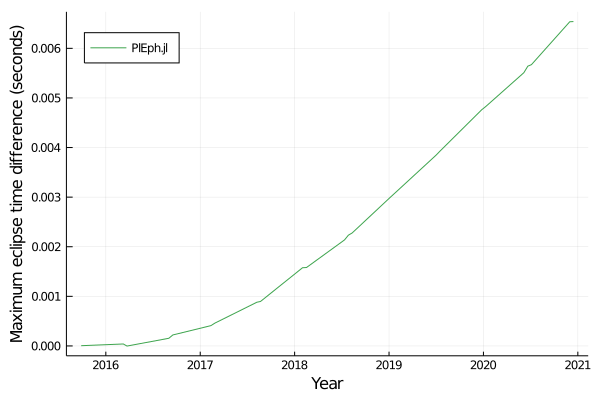

In [417]:
plot(2000 .+(tvS_JPL.-J2000)/yr, yr*24*3600(tS_JPL - tS4[eachindex(tS_JPL)]), label="PlEph.jl", color=3, leg=:topleft)
xlabel!("Year")
ylabel!("Maximum eclipse time difference (seconds)")

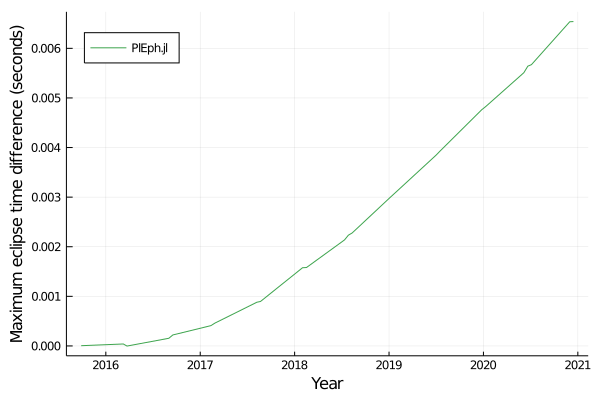

In [659]:
plot(2000 .+(tvS_JPL.-J2000)/yr, yr*24*3600(tS_JPL - tS4[eachindex(tS_JPL)]), label="PlEph.jl", color=3, leg=:topleft)
xlabel!("Year")
ylabel!("Maximum eclipse time difference (seconds)")

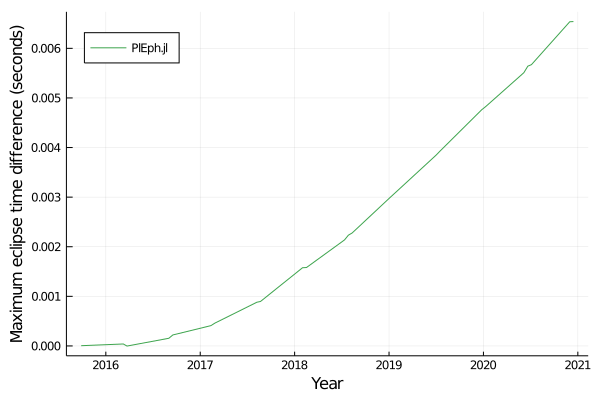

In [88]:
plot(2000 .+(tvS_JPL.-J2000)/yr, yr*24*3600(tS_JPL - tS4[eachindex(tS_JPL)]), label="PlEph.jl", color=3, leg=:topleft)
xlabel!("Year")
ylabel!("Maximum eclipse time difference (seconds)")

In [73]:
#for i in eachindex(tS4)
#    @show tS_JPL[i], tS4[i]
#end

# Comparison vs DE430 

In [89]:
julian2datetime(jd0+tv4[59])

2015-12-07T17:23:54.246

In [90]:
function eph_xv_et(naifid::Int, jd_tdb::Float64, observer_id::Int=10)
    et = (jd_tdb-J2000)*daysec
    pv = spkgeo(naifid, et, "J2000", observer_id)[1]
    pv /= au
    pv[4:6] *= daysec
    return pv
end

eph_xv_et (generic function with 2 methods)

In [91]:
xv4[200, union(3*2-2:3*2,3*(N+2)-2:3*(N+2))]

6-element Array{Float64,1}:
  0.3254878551619564
  0.10059571102931653
  0.01995682874767669
 -0.013621964389578672
  0.024445368284802732
  0.014469839071178141

In [92]:
tvX = jd0.+tv4; xvX = xv4

dxsu = Array{Float64}(undef, length(tvX), 6)
dxme = Array{Float64}(undef, length(tvX), 6)
dxve = Array{Float64}(undef, length(tvX), 6)
dxea = Array{Float64}(undef, length(tvX), 6)
dxmo = Array{Float64}(undef, length(tvX), 6)
xmo_pleph = Array{Float64}(undef, length(tvX), 6)
xea_pleph = Array{Float64}(undef, length(tvX), 6)
xmo_de430 = Array{Float64}(undef, length(tvX), 6)
xea_de430 = Array{Float64}(undef, length(tvX), 6)
dxma = Array{Float64}(undef, length(tvX), 6)
dxju = Array{Float64}(undef, length(tvX), 6)
dxsa = Array{Float64}(undef, length(tvX), 6)
dxne = Array{Float64}(undef, length(tvX), 6)
dxce = Array{Float64}(undef, length(tvX), 6)
dxpl = Array{Float64}(undef, length(tvX), 6)
for i in eachindex(tvX)
    xvXS = xvX[i, union(3*1-2:3*1,3*(N+1)-2:3*(N+1))]
    dxsu[i,:] = (eph_xv_et( 10, tvX[i],0) .- xvXS)*(1e3au)
    dxme[i,:] = (eph_xv_et(199, tvX[i]) .- (xvX[i, union(3* 2-2:3* 2,3*(N+ 2)-2:3*(N+ 2))]-xvXS))*(1e3au)
    dxve[i,:] = (eph_xv_et(299, tvX[i]) .- (xvX[i, union(3* 3-2:3* 3,3*(N+ 3)-2:3*(N+ 3))]-xvXS))*(1e3au)
    xea_pleph[i,:] = (xvX[i, union(3* 4-2:3* 4,3*(N+ 4)-2:3*(N+ 4))]-xvXS)*(1e3au)
    xea_de430[i,:] = eph_xv_et(399, tvX[i])*(1e3au)
    dxea[i,:] = xea_de430[i,:] .- xea_pleph[i,:]
    xmo_pleph[i,:] = (xvX[i, union(3* 5-2:3* 5,3*(N+ 5)-2:3*(N+ 5))]-xvXS)*(1e3au)
    xmo_de430[i,:] = eph_xv_et(301, tvX[i])*(1e3au)
    dxmo[i,:] = xmo_de430[i,:] .- xmo_pleph[i,:]
    dxma[i,:] = (eph_xv_et(  4, tvX[i]) .- (xvX[i, union(3* 6-2:3* 6,3*(N+ 6)-2:3*(N+ 6))]-xvXS))*(1e3au)
    dxju[i,:] = (eph_xv_et(  5, tvX[i]) .- (xvX[i, union(3* 7-2:3* 7,3*(N+ 7)-2:3*(N+ 7))]-xvXS))*(1e3au)
    dxsa[i,:] = (eph_xv_et(  6, tvX[i]) .- (xvX[i, union(3* 8-2:3* 8,3*(N+ 8)-2:3*(N+ 8))]-xvXS))*(1e3au)
    dxne[i,:] = (eph_xv_et(  8, tvX[i]) .- (xvX[i, union(3*10-2:3*10,3*(N+10)-2:3*(N+10))]-xvXS))*(1e3au)
    dxpl[i,:] = (eph_xv_et(  9, tvX[i]) .- (xvX[i, union(3*11-2:3*11,3*(N+11)-2:3*(N+11))]-xvXS))*(1e3au)
    dxce[i,:] = (eph_xv_et(2000001, tvX[i]).-(xvX[i, union(3*12-2:3*12,3*(N+12)-2:3*(N+12))]-xvXS))*(1e3au)
end
dxme_de430 = xmo_de430 - xea_de430
dxme_pleph = xmo_pleph - xea_pleph
;

In [93]:
eph_xv_et(10, tvX[1])

6-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [246]:
#using Plots
#gr()

In [94]:
tvX_yrs = 2000 .+ (tvX.-J2000)/yr;

In [95]:
xlabel_str = "Year"

"Year"

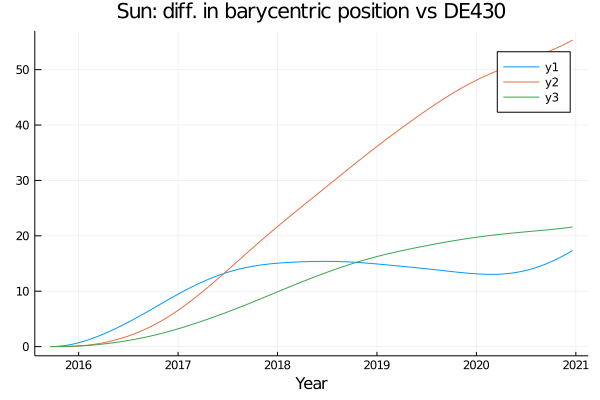

In [96]:
plot( tvX_yrs, dxsu[:,1])
plot!(tvX_yrs, dxsu[:,2])
plot!(tvX_yrs, dxsu[:,3])
title!("Sun: diff. in barycentric position vs DE430")
xlabel!(xlabel_str)

In [667]:
#gr()

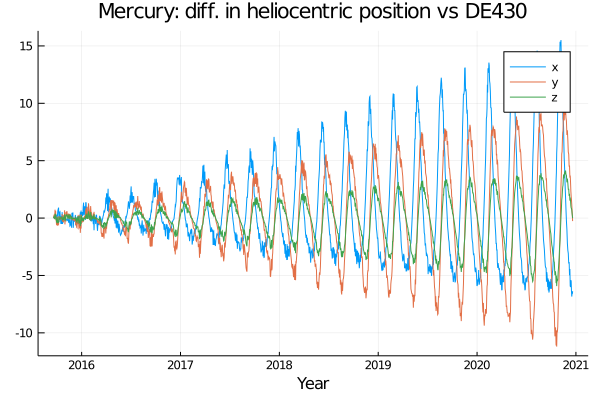

In [97]:
plot( tvX_yrs, dxme[:,1], label="x")
plot!(tvX_yrs, dxme[:,2], label="y")
plot!(tvX_yrs, dxme[:,3], label="z")
title!("Mercury: diff. in heliocentric position vs DE430")
xlabel!(xlabel_str)

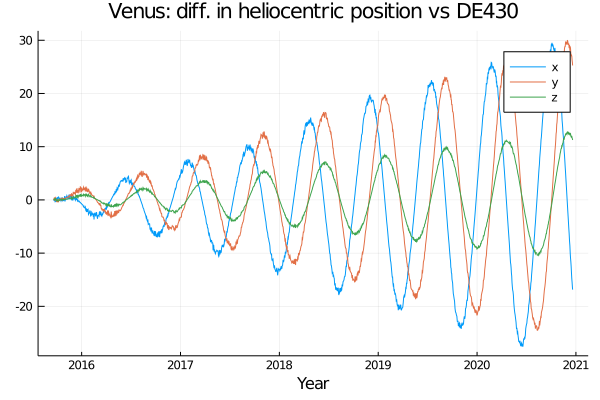

In [98]:
plot( tvX_yrs, dxve[:,1], label="x")
plot!(tvX_yrs, dxve[:,2], label="y")
plot!(tvX_yrs, dxve[:,3], label="z")
title!("Venus: diff. in heliocentric position vs DE430")
xlabel!(xlabel_str)

In [99]:
#plotly()

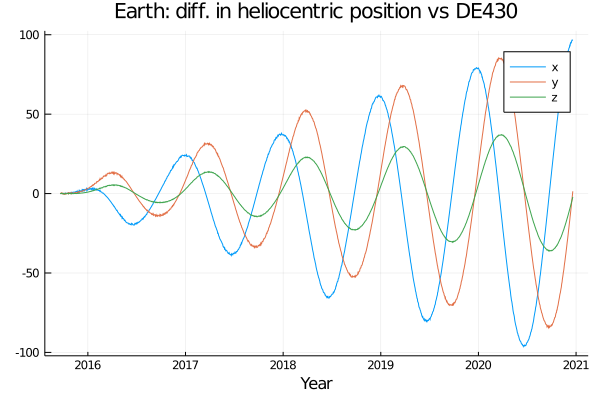

In [100]:
plot( tvX_yrs, dxea[:,1], label="x")
plot!(tvX_yrs, dxea[:,2], label="y")
plot!(tvX_yrs, dxea[:,3], label="z")
title!("Earth: diff. in heliocentric position vs DE430")
xlabel!(xlabel_str)
#ylims!(-10,10)
#xlims!(0,0.3)

In [101]:
#plotly()

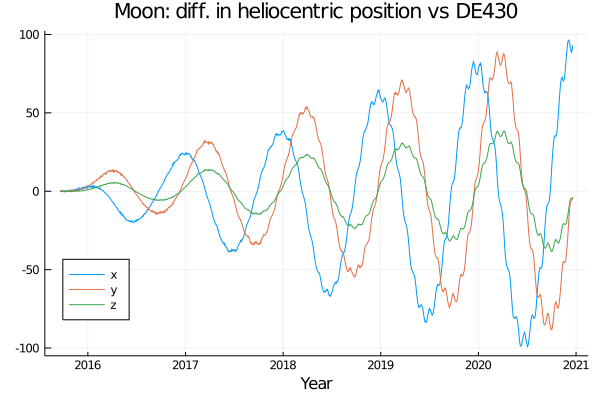

In [102]:
plot( tvX_yrs, dxmo[:,1], label="x", leg=:bottomleft)
plot!(tvX_yrs, dxmo[:,2], label="y")
plot!(tvX_yrs, dxmo[:,3], label="z")
title!("Moon: diff. in heliocentric position vs DE430")
xlabel!(xlabel_str)

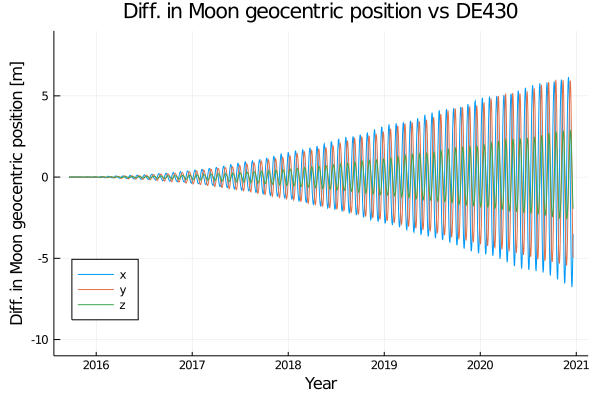

In [103]:
plot( tvX_yrs, dxmo[:,1]-dxea[:,1], label="x", leg=:bottomleft)
plot!(tvX_yrs, dxmo[:,2]-dxea[:,2], label="y")
plot!(tvX_yrs, dxmo[:,3]-dxea[:,3], label="z")
title!("Diff. in Moon geocentric position vs DE430")
xlabel!(xlabel_str)
ylabel!("Diff. in Moon geocentric position [m]")
ylims!(-11,9)
yticks!(-10:5:10)

In [104]:
dxem_pleph = (xmo_pleph .- xea_pleph)/(1e3au)
dxem_de430 = (xmo_de430 .- xea_de430)/(1e3au)
# a_M: Moon semimajor axis
a_M_pleph = semimajoraxis.(dxem_pleph[:,1], dxem_pleph[:,2], dxem_pleph[:,3], dxem_pleph[:,4], dxem_pleph[:,5], dxem_pleph[:,6], μ[ea], μ[mo])
a_M_de430 = semimajoraxis.(dxem_de430[:,1], dxem_de430[:,2], dxem_de430[:,3], dxem_de430[:,4], dxem_de430[:,5], dxem_de430[:,6], μ[ea], μ[mo]);
diff_a_M = (1e3au)*(a_M_de430.-a_M_pleph);

In [105]:
drem_pleph = (1e3au)*sqrt.(dxem_pleph[:,1].^2  + dxem_pleph[:,2].^2  + dxem_pleph[:,3].^2)
drem_de430 = (1e3au)*sqrt.(dxem_de430[:,1].^2  + dxem_de430[:,2].^2  + dxem_de430[:,3].^2);

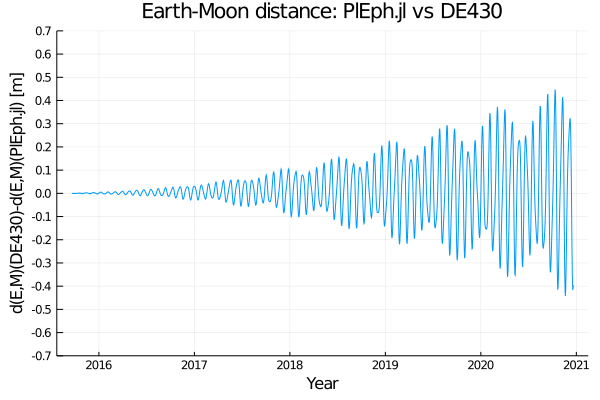

In [106]:
plot(tvX_yrs, drem_de430-drem_pleph, leg=false)
title!("Earth-Moon distance: PlEph.jl vs DE430")
ylabel!("d(E,M)(DE430)-d(E,M)(PlEph.jl) [m]")
xlabel!(xlabel_str)
ylims!(-0.7,0.7)
yticks!(-0.7:0.1:0.7)

In [678]:
#plotly()

In [679]:
#gr()

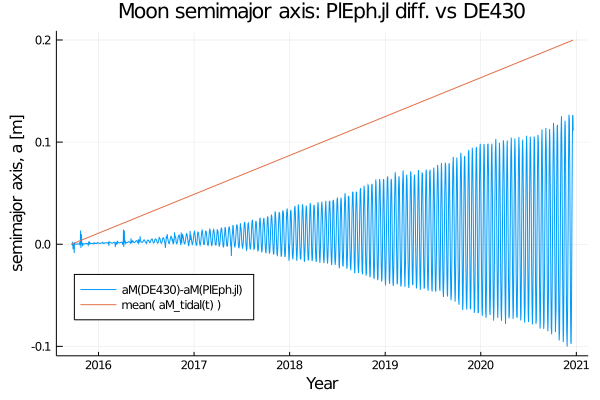

In [107]:
plot( tvX_yrs, diff_a_M, label="aM(DE430)-aM(PlEph.jl)", leg=:bottomleft)
plot!(tvX_yrs, 38.08e-3*(tvX.-tvX[1])/yr, label="mean( aM_tidal(t) )")
title!("Moon semimajor axis: PlEph.jl diff. vs DE430")
ylabel!("semimajor axis, a [m]")
xlabel!(xlabel_str)

In [108]:
using Statistics: mean

In [109]:
lma = 100
diff_a_M_ma = map(x->mean(diff_a_M[x:x+lma]), 1:(length(diff_a_M)-lma)); # moving average

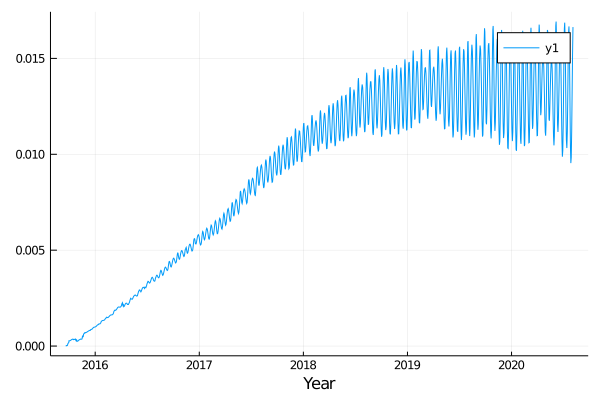

In [110]:
plot(tvX_yrs[1:length(diff_a_M_ma)], diff_a_M_ma.-diff_a_M_ma[1])
#plot!(tvX_yrs, 38.08e-3*(tvX_yrs.-tvX_yrs[1]), label="mean( aM_tidal(t) )")
xlabel!(xlabel_str)

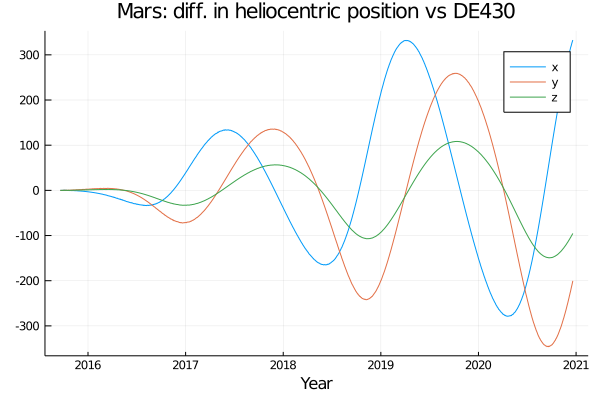

In [111]:
plot( tvX_yrs, dxma[:,1], label="x")
plot!(tvX_yrs, dxma[:,2], label="y")
plot!(tvX_yrs, dxma[:,3], label="z")
title!("Mars: diff. in heliocentric position vs DE430")
xlabel!(xlabel_str)

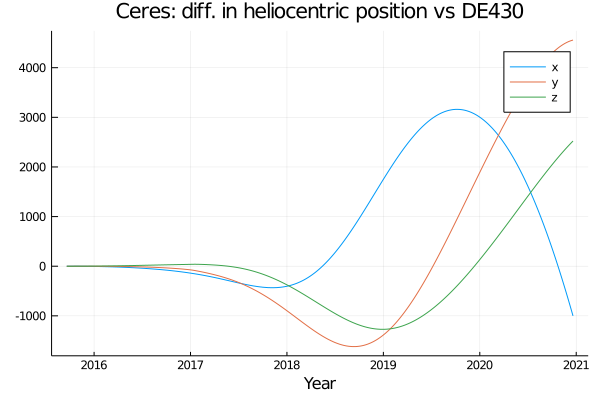

In [112]:
plot( tvX_yrs, dxce[:,1], label="x")
plot!(tvX_yrs, dxce[:,2], label="y")
plot!(tvX_yrs, dxce[:,3], label="z")
title!("Ceres: diff. in heliocentric position vs DE430")
xlabel!(xlabel_str)
#xlims!(0,0.025)
#ylims!(-0.5,0.5)

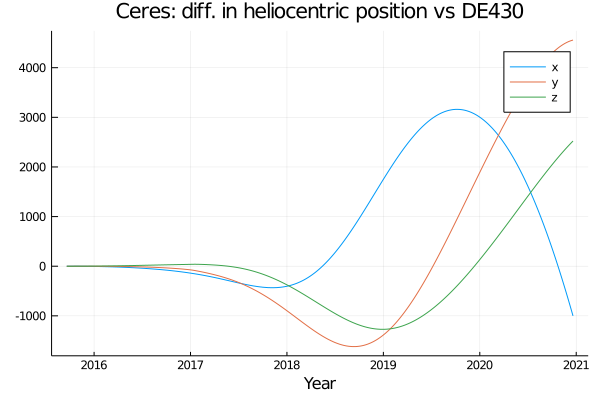

In [446]:
plot( tvX_yrs, dxce[:,1], label="x")
plot!(tvX_yrs, dxce[:,2], label="y")
plot!(tvX_yrs, dxce[:,3], label="z")
title!("Ceres: diff. in heliocentric position vs DE430")
xlabel!(xlabel_str)
#xlims!(0,0.025)
#ylims!(-0.5,0.5)

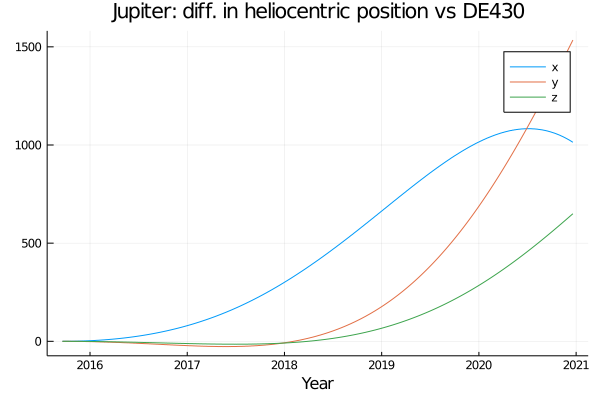

In [447]:
plot( tvX_yrs, dxju[:,1], label="x")
plot!(tvX_yrs, dxju[:,2], label="y")
plot!(tvX_yrs, dxju[:,3], label="z")
title!("Jupiter: diff. in heliocentric position vs DE430")
xlabel!(xlabel_str)

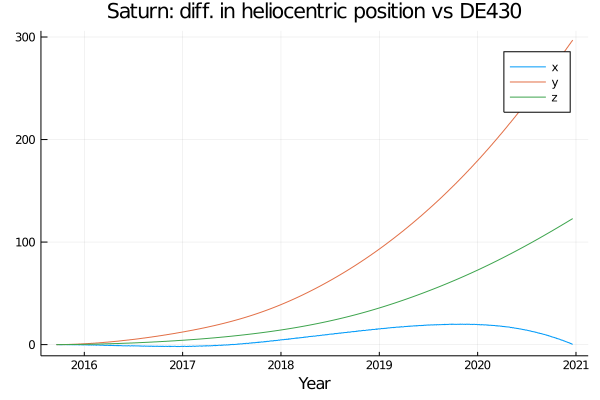

In [448]:
plot( tvX_yrs, dxsa[:,1], label="x")
plot!(tvX_yrs, dxsa[:,2], label="y")
plot!(tvX_yrs, dxsa[:,3], label="z")
title!("Saturn: diff. in heliocentric position vs DE430")
xlabel!(xlabel_str)

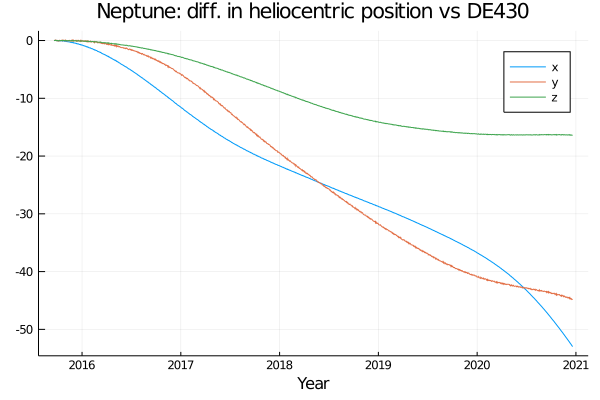

In [449]:
plot( tvX_yrs, dxne[:,1], label="x")
plot!(tvX_yrs, dxne[:,2], label="y")
plot!(tvX_yrs, dxne[:,3], label="z")
title!("Neptune: diff. in heliocentric position vs DE430")
xlabel!(xlabel_str)

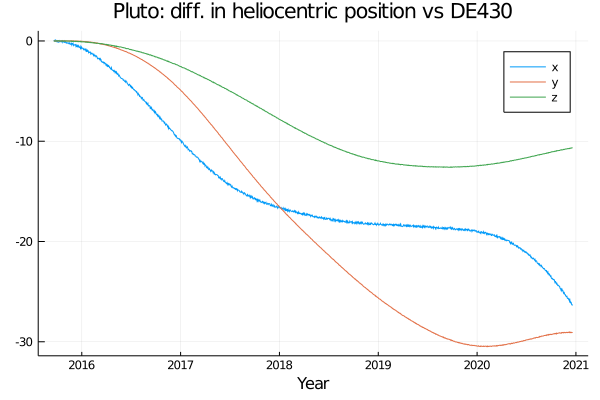

In [450]:
plot( tvX_yrs, dxpl[:,1], label="x")
plot!(tvX_yrs, dxpl[:,2], label="y")
plot!(tvX_yrs, dxpl[:,3], label="z")
title!("Pluto: diff. in heliocentric position vs DE430")
xlabel!(xlabel_str)
#xticks!(tvX[1]:365.25:tvX[end])

## Maximum eclipse times from DE430 ephemeris

In [85]:
using Plots

In [86]:
plotly()

Plots.PlotlyBackend()

In [14]:
tvS4 = tvS_JPL;

In [15]:
jd0 = datetime2julian(DateTime(2015,9,20))

2.4572855e6

In [16]:
tvS4_yrs = 2000 .+ (tvS4.+(jd0-J2000))/yr;

In [88]:
em(et) = spkgeo(301, et, "J2000", 399)[1]
es(et) = spkgeo(10, et, "J2000", 399)[1]

es (generic function with 1 method)

In [103]:
using TaylorSeries

In [104]:
ρdot_mes(et) = begin
    em_et = em(et)
    es_et = es(et)
    
    t = Taylor1(2)

    xSE=es_et[1] + t*es_et[4]
    ySE=es_et[2] + t*es_et[5]
    zSE=es_et[3] + t*es_et[6]
    xME=em_et[1] + t*em_et[4]
    yME=em_et[2] + t*em_et[5]
    zME=em_et[3] + t*em_et[6]
    SE = sqrt(xSE^2 + ySE^2 + zSE^2)
    ME = sqrt(xME^2 + yME^2 + zME^2)
    cos_phase_angle = (xSE*xME+ySE*yME+zSE*zME)/(SE*ME)
    return cos_phase_angle[1]
end

ρdot_mes (generic function with 1 method)

In [105]:
etS4 = (tvS4 .- J2000)*daysec;

In [282]:
indec = 25

25

In [283]:
et0 = etS4[indec]-0.1
etf = etS4[indec]+0.1
etv = et0:0.00001:etf
@show length(etv)
et0 < etS4[indec] < etf

length(etv) = 20001


true

In [284]:
ρdot_mes_et = ρdot_mes.(etv);

In [285]:
indW = findfirst(x->x>etS4[indec], etv)
inds_ = (indW-100≤0 ? 1 : indW-100):(indW+200)

9902:10202

In [286]:
plot(etv[inds_].-etS4[indec], ρdot_mes_et[inds_], m=:circle)
#scatter!(etS4, zero(etS4))

<!DOCTYPE html>
 
 
 Plots.jl

In [287]:
plot(tvS4, -)


<!DOCTYPE html>
 
 
 Plots.jl

In [122]:
tvS4.-J2000

25-element Array{Float64,1}:
 5748.617240890395
 5911.582560653798
 5925.99242420122
 6087.881048415322
 6103.288906602655
 6250.531714972109
 6266.121636933181
 6428.26548592886
 6442.268942759838
 6605.0635903235525
 6620.370252049994
 6767.626939518377
 6782.34973380575
 6796.908364572562
 6944.571818371303
 6959.71806407487
 7122.308797885664
 7136.397637608461
 7298.721913026646
 7314.299854984973
 7461.310291633941
 7476.779096507002
 7490.688757440075
 7638.9060747497715
 7653.177253751084

## Benchmarks